# Volcano Plot

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# cpm 적용 안한 데이터
file_path = "/data1/project/eunyi/tbi/tbi_deseq2.csv"

df = pd.read_csv(file_path)
df

,gene,TBI Acute vs AControl Log2 fold change,Acute pval,Acute padj,TBI Subacute vs SControl Log2 fold change,Subacute pval,Subacute padj,TBI Chronic vs CControl Log2 fold change,Chronic pval,Chronic padj
0,ENSMUSG00000000001,-0.273019,0.140543,0.507674,-0.049062,0.786052,0.965235,-0.123083,0.382603,0.999954
1,ENSMUSG00000000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ENSMUSG00000000028,-0.062120,0.806153,0.950160,-0.265132,0.437850,0.863044,0.381769,0.148879,0.999954
3,ENSMUSG00000000031,-5.061060,0.000042,0.001631,-6.411732,0.000035,0.002810,-2.950333,0.441264,0.999954
4,ENSMUSG00000000037,0.040986,0.958865,NaN,-0.832614,0.446064,NaN,1.088792,0.442097,0.999954
...,...,...,...,...,...,...,...,...,...,...
37676,ENSMUSG00000093370,-1.753574,0.685601,NaN,NaN,NaN,NaN,-0.780197,0.875897,0.999954
37677,ENSMUSG00000093371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37678,ENSMUSG00000093372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37679,ENSMUSG00000093373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
import mygene

# 1. 데이터 불러오기
file_path = "/data1/project/eunyi/tbi/tbi_deseq2.csv"
df = pd.read_csv(file_path)

# 2. mygene 인스턴스 생성
mg = mygene.MyGeneInfo()

# 3. Ensembl ID로 Gene Symbol 매핑
ensembl_ids = df['gene'].tolist()
query_results = mg.querymany(ensembl_ids, scopes='ensembl.gene', fields='symbol', species='mouse')

# 4. 결과를 데이터프레임으로 변환
query_df = pd.DataFrame(query_results)

# 중복된 결과 처리: 중복된 ID에 대해 첫 번째 결과를 선택
query_df.drop_duplicates(subset=['query'], keep='first', inplace=True)

# 5. Gene Symbol 매핑 정보 병합
# Ensembl ID를 기준으로 기존 데이터와 병합
df_merged = pd.merge(df, query_df[['query', 'symbol']], left_on='gene', right_on='query', how='left')

# 매핑되지 않은 ID를 'unmapped'로 표시 (inplace=False를 사용하여 새로운 변수에 할당)
df_merged['symbol'] = df_merged['symbol'].fillna('unmapped')

# 필요없는 'query' 열 제거 후 'symbol' 열을 앞으로 이동
df_merged = df_merged.drop(columns=['query'])
df_merged = df_merged[['symbol'] + [col for col in df_merged.columns if col != 'symbol']]

# 결과 출력
df_merged.head()

3 input query terms found dup hits:	[('ENSMUSG00000008658', 2), ('ENSMUSG00000023809', 2), ('ENSMUSG00000086727', 2)]
6769 input query terms found no hit:	['ENSMUSG00000000325', 'ENSMUSG00000000702', 'ENSMUSG00000001379', 'ENSMUSG00000001417', 'ENSMUSG000


,symbol,gene,TBI Acute vs AControl Log2 fold change,Acute pval,Acute padj,TBI Subacute vs SControl Log2 fold change,Subacute pval,Subacute padj,TBI Chronic vs CControl Log2 fold change,Chronic pval,Chronic padj
0,Gnai3,ENSMUSG00000000001,-0.273019,0.140543,0.507674,-0.049062,0.786052,0.965235,-0.123083,0.382603,0.999954
1,Pbsn,ENSMUSG00000000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Cdc45,ENSMUSG00000000028,-0.062120,0.806153,0.950160,-0.265132,0.437850,0.863044,0.381769,0.148879,0.999954
3,H19,ENSMUSG00000000031,-5.061060,0.000042,0.001631,-6.411732,0.000035,0.002810,-2.950333,0.441264,0.999954
4,Scml2,ENSMUSG00000000037,0.040986,0.958865,NaN,-0.832614,0.446064,NaN,1.088792,0.442097,0.999954


In [4]:
# 'unmapped'로 표시된 항목의 개수 계산
unmapped_count = df_merged[df_merged['symbol'] == 'unmapped'].shape[0]

# 결과 출력
print(f"Number of 'unmapped' entries: {unmapped_count}")

Number of 'unmapped' entries: 6774


In [5]:
# 'unmapped'로 표시된 행을 제거
df_filtered = df_merged[df_merged['symbol'] != 'unmapped']

# 결과 출력
df_filtered

,symbol,gene,TBI Acute vs AControl Log2 fold change,Acute pval,Acute padj,TBI Subacute vs SControl Log2 fold change,Subacute pval,Subacute padj,TBI Chronic vs CControl Log2 fold change,Chronic pval,Chronic padj
0,Gnai3,ENSMUSG00000000001,-0.273019,0.140543,0.507674,-0.049062,0.786052,0.965235,-0.123083,0.382603,0.999954
1,Pbsn,ENSMUSG00000000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Cdc45,ENSMUSG00000000028,-0.062120,0.806153,0.950160,-0.265132,0.437850,0.863044,0.381769,0.148879,0.999954
3,H19,ENSMUSG00000000031,-5.061060,0.000042,0.001631,-6.411732,0.000035,0.002810,-2.950333,0.441264,0.999954
4,Scml2,ENSMUSG00000000037,0.040986,0.958865,NaN,-0.832614,0.446064,NaN,1.088792,0.442097,0.999954
...,...,...,...,...,...,...,...,...,...,...,...
37654,Mir3101,ENSMUSG00000093348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37657,Mir3072,ENSMUSG00000093351,-0.950471,0.829966,NaN,-2.210083,0.614871,NaN,NaN,NaN,NaN
37660,Mir125b-1,ENSMUSG00000093354,-1.839607,0.670528,NaN,2.678071,0.569418,NaN,NaN,NaN,NaN
37661,Snora26,ENSMUSG00000093355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df = df_filtered

# 'gene' 열을 제외한 데이터 열 선택
df = df.drop(columns=['gene'])
# 'symbol' 열을 'gene'으로 이름 변경
df = df.rename(columns={'symbol': 'gene'})

df.to_csv("/data1/project/eunyi/tbi/tbi_deseq2_gene.csv")
df

,gene,TBI Acute vs AControl Log2 fold change,Acute pval,Acute padj,TBI Subacute vs SControl Log2 fold change,Subacute pval,Subacute padj,TBI Chronic vs CControl Log2 fold change,Chronic pval,Chronic padj
0,Gnai3,-0.273019,0.140543,0.507674,-0.049062,0.786052,0.965235,-0.123083,0.382603,0.999954
1,Pbsn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Cdc45,-0.062120,0.806153,0.950160,-0.265132,0.437850,0.863044,0.381769,0.148879,0.999954
3,H19,-5.061060,0.000042,0.001631,-6.411732,0.000035,0.002810,-2.950333,0.441264,0.999954
4,Scml2,0.040986,0.958865,NaN,-0.832614,0.446064,NaN,1.088792,0.442097,0.999954
...,...,...,...,...,...,...,...,...,...,...
37654,Mir3101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37657,Mir3072,-0.950471,0.829966,NaN,-2.210083,0.614871,NaN,NaN,NaN,NaN
37660,Mir125b-1,-1.839607,0.670528,NaN,2.678071,0.569418,NaN,NaN,NaN,NaN
37661,Snora26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df['Acute-log10(p_value)'] = -np.log10(df['Acute pval'])
df['Subacute-log10(p_value)'] = -np.log10(df['Subacute pval'])
df['Chronic-log10(p_value)'] = -np.log10(df['Chronic pval'])
df['Acute-log10(padj)'] = -np.log10(df['Acute padj'])
df['Subacute-log10(padj)'] = -np.log10(df['Subacute padj'])
df['Chronic-log10(padj)'] = -np.log10(df['Chronic padj'])

In [8]:
df.dropna(inplace=True)

In [12]:
df.columns

Index(['gene', 'TBI Acute vs AControl Log2 fold change', 'Acute pval',
       'Acute padj', 'TBI Subacute vs SControl Log2 fold change',
       'Subacute pval', 'Subacute padj',
       'TBI Chronic vs CControl Log2 fold change', 'Chronic pval',
       'Chronic padj', 'Acute-log10(p_value)', 'Subacute-log10(p_value)',
       'Chronic-log10(p_value)', 'Acute-log10(padj)', 'Subacute-log10(padj)',
       'Chronic-log10(padj)'],
      dtype='object')

In [10]:
# 필터링 기준 정의
up_regulated_criteria_acute = (df['TBI Acute vs AControl Log2 fold change'] > 1.00) & (df['Acute padj'] < 0.05)
down_regulated_criteria_acute = (df['TBI Acute vs AControl Log2 fold change'] < -0.8) & (df['Acute padj'] < 0.05)

up_regulated_criteria_subacute = (df['TBI Subacute vs SControl Log2 fold change'] > 1.00) & (df['Subacute padj'] < 0.05)
down_regulated_criteria_subacute = (df['TBI Subacute vs SControl Log2 fold change'] < -0.8) & (df['Subacute padj'] < 0.05)

up_regulated_criteria_chronic = (df['TBI Chronic vs CControl Log2 fold change'] > 1.00) & (df['Chronic padj'] < 0.05)
down_regulated_criteria_chronic = (df['TBI Chronic vs CControl Log2 fold change'] < -0.8) & (df['Chronic padj'] < 0.05)

# 각 조건별로 필터링
acute_up = df[up_regulated_criteria_acute]
acute_down = df[down_regulated_criteria_acute]

subacute_up = df[up_regulated_criteria_subacute]
subacute_down = df[down_regulated_criteria_subacute]

chronic_up = df[up_regulated_criteria_chronic]
chronic_down = df[down_regulated_criteria_chronic]

# 각 조건별 유전자 수 계산
acute_up_count = len(acute_up)
acute_down_count = len(acute_down)

subacute_up_count = len(subacute_up)
subacute_down_count = len(subacute_down)

chronic_up_count = len(chronic_up)
chronic_down_count = len(chronic_down)

# 전체 합계
total_up = acute_up_count + subacute_up_count + chronic_up_count
total_down = acute_down_count + subacute_down_count + chronic_down_count

# 결과 출력
print(f"Acute Up: {acute_up_count}")
print(f"Acute Down: {acute_down_count}")
print(f"Subacute Up: {subacute_up_count}")
print(f"Subacute Down: {subacute_down_count}")
print(f"Chronic Up: {chronic_up_count}")
print(f"Chronic Down: {chronic_down_count}")
print(f"Total Up: {total_up}")
print(f"Total Down: {total_down}")


Acute Up: 101
Acute Down: 466
Subacute Up: 26
Subacute Down: 293
Chronic Up: 0
Chronic Down: 0
Total Up: 127
Total Down: 759


In [11]:
df_acute = df[['gene', 'TBI Acute vs AControl Log2 fold change', 'Acute pval', 'Acute-log10(p_value)', 'Acute padj', 'Acute-log10(padj)']]
df_subacute = df[['gene', 'TBI Subacute vs SControl Log2 fold change', 'Subacute pval', 'Subacute-log10(p_value)', 'Subacute padj', 'Subacute-log10(padj)']]
df_chronic = df[['gene', 'TBI Chronic vs CControl Log2 fold change', 'Chronic pval', 'Chronic-log10(p_value)', 'Chronic padj', 'Chronic-log10(padj)']]
df_acute

,gene,TBI Acute vs AControl Log2 fold change,Acute pval,Acute-log10(p_value),Acute padj,Acute-log10(padj)
0,Gnai3,-0.273019,0.140543,0.852192,0.507674,0.294415
2,Cdc45,-0.062120,0.806153,0.093583,0.950160,0.022203
3,H19,-5.061060,0.000042,4.376073,0.001631,2.787581
6,Narf,0.029069,0.883454,0.053816,0.972227,0.012232
7,Cav2,0.524588,0.002862,2.543350,0.043162,1.364894
...,...,...,...,...,...,...
37193,Snord53,-0.117798,0.872657,0.059157,0.969312,0.013537
37291,Mir378b,0.235532,0.574041,0.241057,0.873293,0.058840
37446,Mir28b,0.652328,0.353101,0.452101,0.746525,0.126956
37583,Gm26236,0.450093,0.146355,0.834594,0.517531,0.286064


/tmp/ipykernel_3017139/3883955227.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subacute['color'] = 'gray'  # 기본 색상


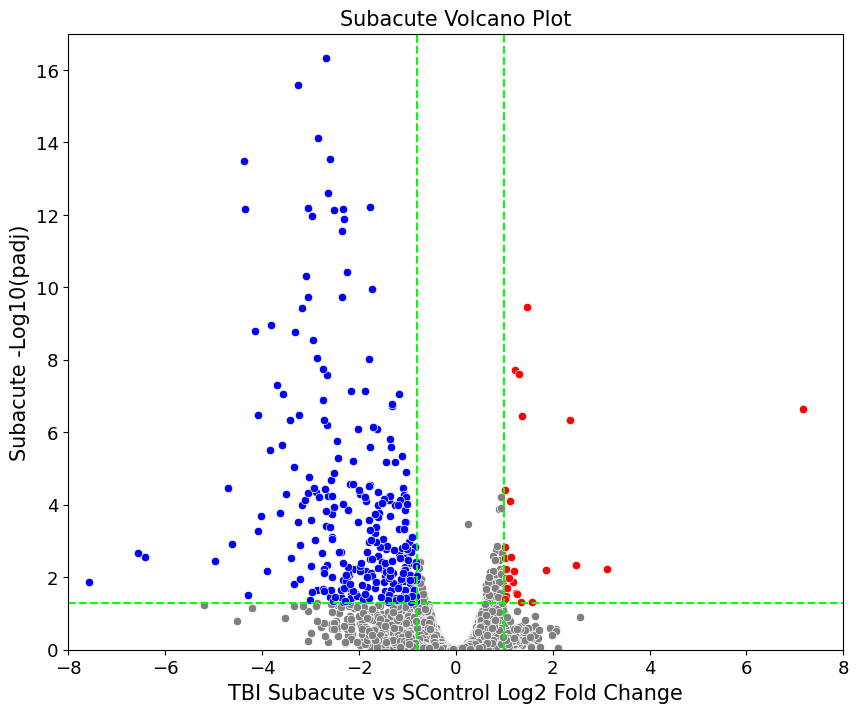

In [13]:
# 조건에 따른 색상 지정
df_subacute['color'] = 'gray'  # 기본 색상
df_subacute.loc[(df_subacute['Subacute padj'] < 0.05) & (df_subacute['TBI Subacute vs SControl Log2 fold change'] > 1.0), 'color'] = 'red'
df_subacute.loc[(df_subacute['Subacute padj'] < 0.05) & (df_subacute['TBI Subacute vs SControl Log2 fold change'] < -0.8), 'color'] = 'blue'

# Volcano plot
plt.figure(figsize=(10, 8))
# sns.scatterplot(data=df_subacute, x='TBI Subacute vs SControl Log2 fold change', y='Subacute-log10(p_value)', c=df_subacute['color'])

# 회색 데이터 포인트 그리기
sns.scatterplot(data=df_subacute[df_subacute['color'] == 'gray'], x='TBI Subacute vs SControl Log2 fold change', y='Subacute-log10(padj)', color='gray')
# 파란색 데이터 포인트 그리기
sns.scatterplot(data=df_subacute[df_subacute['color'] == 'red'], x='TBI Subacute vs SControl Log2 fold change', y='Subacute-log10(padj)', color='red')
sns.scatterplot(data=df_subacute[df_subacute['color'] == 'blue'], x='TBI Subacute vs SControl Log2 fold change', y='Subacute-log10(padj)', color='blue')
plt.xlim(-8, 8)
plt.ylim(0, 17) 


# 임계값 선 추가
plt.axhline(y=-np.log10(0.05), color='lime', linestyle='--')  # p-value 임계값 (예: 0.05)
plt.axvline(x=1, color='lime', linestyle='--')  # fold change 임계값 (예: 1)
plt.axvline(x=-0.8, color='lime', linestyle='--')  # fold change 임계값 (예: -1)


# 축 레이블과 제목 추가
plt.xlabel('TBI Subacute vs SControl Log2 Fold Change', fontsize=15)
plt.ylabel('Subacute -Log10(padj)', fontsize=15)
plt.title('Subacute Volcano Plot', fontsize=15)

# 축 눈금 폰트 크기 설정
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# 출력
plt.show()

In [18]:
# 빨간색 데이터 포인트 개수 (padj < 0.05 그리고 Log2 fold change > 1.0)
red_count = df_subacute[(df_subacute['Subacute padj'] < 0.05) & 
                        (df_subacute['TBI Subacute vs SControl Log2 fold change'] > 1.0)].shape[0]

# 파란색 데이터 포인트 개수 (p-value < 0.05 그리고 Log2 fold change < -0.8)
blue_count = df_subacute[(df_subacute['Subacute padj'] < 0.05) & 
                         (df_subacute['TBI Subacute vs SControl Log2 fold change'] < -0.8)].shape[0]

# 결과 출력
print(f"subacute up: {red_count}")
print(f"subacute down: {blue_count}")


subacute up: 26
subacute down: 293


/tmp/ipykernel_3017139/216763652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acute['color'] = 'gray'  # 기본 색상


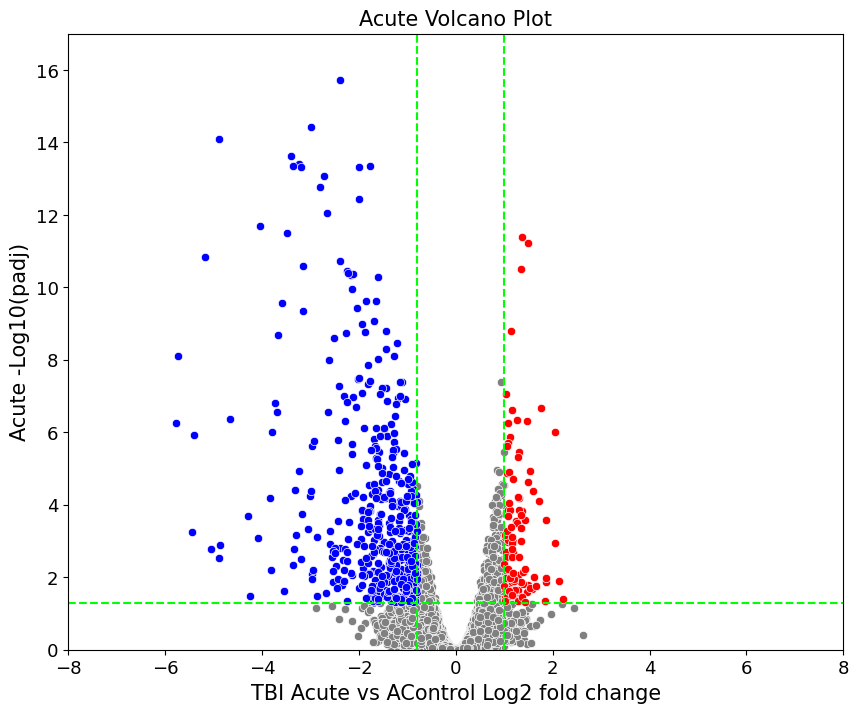

In [19]:
# 조건에 따른 색상 지정
df_acute['color'] = 'gray'  # 기본 색상
df_acute.loc[(df_acute['Acute padj'] < 0.05) & (df_acute['TBI Acute vs AControl Log2 fold change'] > 1.0), 'color'] = 'red'
df_acute.loc[(df_acute['Acute padj'] < 0.05) & (df_acute['TBI Acute vs AControl Log2 fold change'] < -0.8), 'color'] = 'blue'

# Volcano plot
plt.figure(figsize=(10, 8))

# 회색 데이터 포인트 그리기
sns.scatterplot(data=df_acute[df_acute['color'] == 'gray'], x='TBI Acute vs AControl Log2 fold change', y='Acute-log10(padj)', color='gray')
# 파란색 데이터 포인트 그리기
sns.scatterplot(data=df_acute[df_acute['color'] == 'red'], x='TBI Acute vs AControl Log2 fold change', y='Acute-log10(padj)', color='red')
sns.scatterplot(data=df_acute[df_acute['color'] == 'blue'], x='TBI Acute vs AControl Log2 fold change', y='Acute-log10(padj)', color='blue')
plt.xlim(-8, 8)
plt.ylim(0, 17) 


# 임계값 선 추가
plt.axhline(y=-np.log10(0.05), color='lime', linestyle='--')  # p-value 임계값 (예: 0.05)
plt.axvline(x=1, color='lime', linestyle='--')  # fold change 임계값 (예: 1)
plt.axvline(x=-0.8, color='lime', linestyle='--')  # fold change 임계값 (예: -1)


# 축 레이블과 제목 추가
plt.xlabel('TBI Acute vs AControl Log2 fold change', fontsize=15)
plt.ylabel('Acute -Log10(padj)', fontsize=15)
plt.title('Acute Volcano Plot', fontsize=15)

# 축 눈금 폰트 크기 설정
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# 출력
plt.show()

In [20]:
df_subacute_up = df_subacute[(df_subacute['Subacute padj'] < 0.05)  & (df_subacute['TBI Subacute vs SControl Log2 fold change'] > 1)]
df_subacute_up

,gene,TBI Subacute vs SControl Log2 fold change,Subacute pval,Subacute-log10(p_value),Subacute padj,Subacute-log10(padj),color
153,Dbh,7.165736,6.749045e-10,9.170758,2.240836e-07,6.649590,red
724,Ctse,1.341478,1.415438e-03,2.849109,4.721035e-02,1.325963,red
991,Crip1,1.115518,5.383702e-07,6.268919,7.787179e-05,4.108620,red
1283,Cox4i2,1.031619,8.574065e-04,3.066813,3.322507e-02,1.478534,red
2356,Ptprr,1.038708,8.934549e-05,4.048927,5.932946e-03,2.226730,red
3224,Marveld2,1.046147,1.833015e-04,3.736834,1.018195e-02,1.992169,red
6109,Mall,1.205664,1.018109e-04,3.992206,6.523487e-03,2.185520,red
10163,Thrsp,1.855456,9.546884e-05,4.020138,6.254280e-03,2.203823,red
12346,Selenow,1.023931,3.731215e-05,4.428150,2.899432e-03,2.537687,red
12756,Dpm3,1.146250,3.297170e-05,4.481859,2.676019e-03,2.572511,red


In [21]:
df_subacute_down = df_subacute[(df_subacute['Subacute padj'] < 0.05) & (df_subacute['TBI Subacute vs SControl Log2 fold change'] < -0.8)]
df_subacute_down

,gene,TBI Subacute vs SControl Log2 fold change,Subacute pval,Subacute-log10(p_value),Subacute padj,Subacute-log10(padj),color
3,H19,-6.411732,3.519939e-05,4.453465,2.809988e-03,2.551295,blue
163,Mmp14,-1.159592,2.601550e-04,3.584768,1.331625e-02,1.875618,blue
164,Slc7a7,-1.164751,2.781826e-05,4.555670,2.309073e-03,2.636562,blue
176,S100a6,-2.354203,3.258161e-15,14.487027,2.799910e-12,11.552856,blue
196,Col6a1,-1.466492,1.651110e-04,3.782224,9.422291e-03,2.025843,blue
...,...,...,...,...,...,...,...
24837,Naip6,-2.552453,8.685145e-06,5.061223,8.872817e-04,3.051938,blue
24838,Naip2,-2.331997,6.773642e-07,6.169178,9.515013e-05,4.021591,blue
27875,Ccl19-ps1,-1.363853,9.478085e-05,4.023279,6.237177e-03,2.205012,blue
30510,Gm4279,-2.280316,1.317392e-03,2.880285,4.486981e-02,1.348046,blue


In [22]:
df_acute_up = df_acute[(df_acute['Acute padj'] < 0.05)  & (df_acute['TBI Acute vs AControl Log2 fold change'] > 1)]
df_acute_up

,gene,TBI Acute vs AControl Log2 fold change,Acute pval,Acute-log10(p_value),Acute padj,Acute-log10(padj),color
52,Tpd52l1,1.024890,2.304307e-03,2.637460,0.036567,1.436911,red
59,Alox12,1.012333,1.613931e-05,4.792115,0.000769,3.113979,red
141,Car4,1.052558,1.251582e-07,6.902541,0.000013,4.876057,red
517,Apoe,1.033645,2.669388e-06,5.573588,0.000173,3.762025,red
699,Gpx6,1.608690,3.914800e-04,3.407290,0.009544,2.020265,red
...,...,...,...,...,...,...,...
29923,Gm16070,1.376379,2.098009e-03,2.678193,0.034173,1.466319,red
30692,Gm12951,1.831804,2.958906e-03,2.528869,0.043935,1.357194,red
31070,Gm15564,1.356809,8.551223e-06,5.067972,0.000450,3.347180,red
31660,4930481A15Rik,1.437219,3.292641e-03,2.482456,0.047413,1.324105,red


In [23]:
df_acute_down = df_acute[(df_acute['Acute padj'] < 0.05)  & (df_acute['TBI Acute vs AControl Log2 fold change'] < -0.8)]
df_acute_down

,gene,TBI Acute vs AControl Log2 fold change,Acute pval,Acute-log10(p_value),Acute padj,Acute-log10(padj),color
3,H19,-5.061060,4.206555e-05,4.376073,0.001631,2.787581,blue
53,Pemt,-1.672662,1.640440e-03,2.785040,0.028580,1.543937,blue
81,Galnt1,-1.158803,1.025990e-06,5.988857,0.000078,4.107160,blue
94,Itga5,-0.875024,4.047318e-07,6.392833,0.000037,4.430160,blue
134,Polr3d,-0.869396,3.711726e-05,4.430424,0.001470,2.832635,blue
...,...,...,...,...,...,...,...
24972,Gm8818,-1.446284,5.558146e-05,4.255070,0.002038,2.690877,blue
25186,Gm15737,-1.130744,7.463258e-04,3.127072,0.015729,1.803291,blue
27875,Ccl19-ps1,-0.969626,3.113728e-03,2.506719,0.045457,1.342402,blue
28688,Gm13394,-1.243662,1.577892e-07,6.801923,0.000016,4.787761,blue


In [66]:
subacute_up_list = df_subacute_up['gene'].to_list()
subacute_down_list = df_subacute_down['gene'].to_list()
acute_up_list = df_acute_up['gene'].to_list()
acute_down_list = df_acute_down['gene'].to_list()


In [67]:
with open('1.subacute_up_deg_list.txt', 'w') as file:
    for item in subacute_up_list:
        file.write(f"{item}\n")

with open('1.subacute_down_deg_list.txt', 'w') as file:
    for item in subacute_down_list:
        file.write(f"{item}\n")

with open('1.acute_up_deg_list.txt', 'w') as file:
    for item in acute_up_list:
        file.write(f"{item}\n")

with open('1.acute_down_deg_list.txt', 'w') as file:
    for item in acute_down_list:
        file.write(f"{item}\n")

cpm 적용

In [24]:
# cpm 적용 데이터
file_path = "/data1/project/eunyi/tbi/tbi_deseq2_cpm.csv"

df_cpm = pd.read_csv(file_path)
df_cpm

,gene,TBI Acute vs AControl Log2 fold change,Acute pval,Acute padj,TBI Subacute vs SControl Log2 fold change,Subacute pval,Subacute padj,TBI Chronic vs CControl Log2 fold change,Chronic pval,Chronic padj
0,ENSMUSG00000000001,-0.280304,0.141225,0.453473,0.081709,0.648958,0.898983,-0.104235,0.469067,0.999907
1,ENSMUSG00000000056,0.024106,0.901961,0.970707,0.050519,0.800830,0.955588,-0.043247,0.766378,0.999907
2,ENSMUSG00000000058,0.518505,0.003654,0.047533,-0.250337,0.196194,0.621113,-0.101298,0.436288,0.999907
3,ENSMUSG00000000078,0.116703,0.595141,0.857558,-0.044379,0.817897,0.958927,0.130132,0.463811,0.999907
4,ENSMUSG00000000085,0.141013,0.454048,0.773226,0.365836,0.044956,0.351498,0.023591,0.863685,0.999907
...,...,...,...,...,...,...,...,...,...,...
7879,ENSMUSG00000092416,0.271246,0.201611,0.549550,-0.241889,0.309649,0.718325,0.065298,0.739437,0.999907
7880,ENSMUSG00000092558,0.192205,0.245638,0.601418,-0.168781,0.390136,0.778852,0.006427,0.967640,0.999907
7881,ENSMUSG00000092607,0.278969,0.149311,0.465445,-0.101530,0.616011,0.888007,-0.302798,0.155660,0.999907
7882,ENSMUSG00000093077,1.129989,0.000007,0.000405,-1.252231,0.000021,0.003561,0.644249,0.000558,0.293473


In [25]:
import mygene

# 1. 데이터 불러오기
file_path = "/data1/project/eunyi/tbi/tbi_deseq2_cpm.csv"
df = pd.read_csv(file_path)

# 2. mygene 인스턴스 생성
mg = mygene.MyGeneInfo()

# 3. Ensembl ID로 Gene Symbol 매핑
ensembl_ids = df['gene'].tolist()
query_results = mg.querymany(ensembl_ids, scopes='ensembl.gene', fields='symbol', species='mouse')

# 4. 결과를 데이터프레임으로 변환
query_df = pd.DataFrame(query_results)

# 중복된 결과 처리: 중복된 ID에 대해 첫 번째 결과를 선택
query_df.drop_duplicates(subset=['query'], keep='first', inplace=True)

# 5. Gene Symbol 매핑 정보 병합
# Ensembl ID를 기준으로 기존 데이터와 병합
df_merged = pd.merge(df, query_df[['query', 'symbol']], left_on='gene', right_on='query', how='left')

# 매핑되지 않은 ID를 'unmapped'로 표시 (inplace=False를 사용하여 새로운 변수에 할당)
df_merged['symbol'] = df_merged['symbol'].fillna('unmapped')

# 필요없는 'query' 열 제거 후 'symbol' 열을 앞으로 이동
df_merged = df_merged.drop(columns=['query'])
df_merged = df_merged[['symbol'] + [col for col in df_merged.columns if col != 'symbol']]

# 결과 출력
df_cpm = df_merged
df_cpm.head()

1 input query terms found dup hits:	[('ENSMUSG00000023809', 2)]
70 input query terms found no hit:	['ENSMUSG00000003178', 'ENSMUSG00000019769', 'ENSMUSG00000021745', 'ENSMUSG00000023846', 'ENSMUSG000


,symbol,gene,TBI Acute vs AControl Log2 fold change,Acute pval,Acute padj,TBI Subacute vs SControl Log2 fold change,Subacute pval,Subacute padj,TBI Chronic vs CControl Log2 fold change,Chronic pval,Chronic padj
0,Gnai3,ENSMUSG00000000001,-0.280304,0.141225,0.453473,0.081709,0.648958,0.898983,-0.104235,0.469067,0.999907
1,Narf,ENSMUSG00000000056,0.024106,0.901961,0.970707,0.050519,0.800830,0.955588,-0.043247,0.766378,0.999907
2,Cav2,ENSMUSG00000000058,0.518505,0.003654,0.047533,-0.250337,0.196194,0.621113,-0.101298,0.436288,0.999907
3,Klf6,ENSMUSG00000000078,0.116703,0.595141,0.857558,-0.044379,0.817897,0.958927,0.130132,0.463811,0.999907
4,Scmh1,ENSMUSG00000000085,0.141013,0.454048,0.773226,0.365836,0.044956,0.351498,0.023591,0.863685,0.999907


In [26]:
# 'unmapped'로 표시된 항목의 개수 계산
unmapped_count = df_cpm[df_cpm['symbol'] == 'unmapped'].shape[0]

# 결과 출력
print(f"Number of 'unmapped' entries: {unmapped_count}")

Number of 'unmapped' entries: 70


In [27]:
# 'unmapped'로 표시된 행을 제거
df_filtered = df_cpm[df_cpm['symbol'] != 'unmapped']

# 결과 출력
df_filtered

,symbol,gene,TBI Acute vs AControl Log2 fold change,Acute pval,Acute padj,TBI Subacute vs SControl Log2 fold change,Subacute pval,Subacute padj,TBI Chronic vs CControl Log2 fold change,Chronic pval,Chronic padj
0,Gnai3,ENSMUSG00000000001,-0.280304,0.141225,0.453473,0.081709,0.648958,0.898983,-0.104235,0.469067,0.999907
1,Narf,ENSMUSG00000000056,0.024106,0.901961,0.970707,0.050519,0.800830,0.955588,-0.043247,0.766378,0.999907
2,Cav2,ENSMUSG00000000058,0.518505,0.003654,0.047533,-0.250337,0.196194,0.621113,-0.101298,0.436288,0.999907
3,Klf6,ENSMUSG00000000078,0.116703,0.595141,0.857558,-0.044379,0.817897,0.958927,0.130132,0.463811,0.999907
4,Scmh1,ENSMUSG00000000085,0.141013,0.454048,0.773226,0.365836,0.044956,0.351498,0.023591,0.863685,0.999907
...,...,...,...,...,...,...,...,...,...,...,...
7877,Neat1,ENSMUSG00000092274,0.485018,0.015745,0.126777,0.139985,0.484377,0.830396,0.246062,0.635320,0.999907
7878,Malat1,ENSMUSG00000092341,0.355006,0.076182,0.329042,-0.106222,0.659577,0.902086,-0.302466,0.033051,0.999907
7879,Zfp141,ENSMUSG00000092416,0.271246,0.201611,0.549550,-0.241889,0.309649,0.718325,0.065298,0.739437,0.999907
7880,Med20,ENSMUSG00000092558,0.192205,0.245638,0.601418,-0.168781,0.390136,0.778852,0.006427,0.967640,0.999907


In [28]:
df_cpm = df_filtered

# 'gene' 열을 제외한 데이터 열 선택
df_cpm = df_cpm.drop(columns=['gene'])
# 'symbol' 열을 'gene'으로 이름 변경
df_cpm = df_cpm.rename(columns={'symbol': 'gene'})

df_cpm.to_csv("/data1/project/eunyi/tbi/tbi_deseq2_cpm_gene.csv")
df_cpm

,gene,TBI Acute vs AControl Log2 fold change,Acute pval,Acute padj,TBI Subacute vs SControl Log2 fold change,Subacute pval,Subacute padj,TBI Chronic vs CControl Log2 fold change,Chronic pval,Chronic padj
0,Gnai3,-0.280304,0.141225,0.453473,0.081709,0.648958,0.898983,-0.104235,0.469067,0.999907
1,Narf,0.024106,0.901961,0.970707,0.050519,0.800830,0.955588,-0.043247,0.766378,0.999907
2,Cav2,0.518505,0.003654,0.047533,-0.250337,0.196194,0.621113,-0.101298,0.436288,0.999907
3,Klf6,0.116703,0.595141,0.857558,-0.044379,0.817897,0.958927,0.130132,0.463811,0.999907
4,Scmh1,0.141013,0.454048,0.773226,0.365836,0.044956,0.351498,0.023591,0.863685,0.999907
...,...,...,...,...,...,...,...,...,...,...
7877,Neat1,0.485018,0.015745,0.126777,0.139985,0.484377,0.830396,0.246062,0.635320,0.999907
7878,Malat1,0.355006,0.076182,0.329042,-0.106222,0.659577,0.902086,-0.302466,0.033051,0.999907
7879,Zfp141,0.271246,0.201611,0.549550,-0.241889,0.309649,0.718325,0.065298,0.739437,0.999907
7880,Med20,0.192205,0.245638,0.601418,-0.168781,0.390136,0.778852,0.006427,0.967640,0.999907


In [29]:
df_cpm['Acute-log10(p_value)'] = -np.log10(df_cpm['Acute pval'])
df_cpm['Subacute-log10(p_value)'] = -np.log10(df_cpm['Subacute pval'])
df_cpm['Chronic-log10(p_value)'] = -np.log10(df_cpm['Chronic pval'])
df_cpm['Acute-log10(padj)'] = -np.log10(df_cpm['Acute padj'])
df_cpm['Subacute-log10(padj)'] = -np.log10(df_cpm['Subacute padj'])
df_cpm['Chronic-log10(padj)'] = -np.log10(df_cpm['Chronic padj'])

In [30]:
df_cpm.dropna(inplace=True)

In [31]:
df_cpm.columns

Index(['gene', 'TBI Acute vs AControl Log2 fold change', 'Acute pval',
       'Acute padj', 'TBI Subacute vs SControl Log2 fold change',
       'Subacute pval', 'Subacute padj',
       'TBI Chronic vs CControl Log2 fold change', 'Chronic pval',
       'Chronic padj', 'Acute-log10(p_value)', 'Subacute-log10(p_value)',
       'Chronic-log10(p_value)', 'Acute-log10(padj)', 'Subacute-log10(padj)',
       'Chronic-log10(padj)'],
      dtype='object')

In [32]:
# 필터링 기준 정의
up_regulated_criteria_acute = (df_cpm['TBI Acute vs AControl Log2 fold change'] > 1.00) & (df_cpm['Acute padj'] < 0.05)
down_regulated_criteria_acute = (df_cpm['TBI Acute vs AControl Log2 fold change'] < -0.8) & (df_cpm['Acute padj'] < 0.05)

up_regulated_criteria_subacute = (df_cpm['TBI Subacute vs SControl Log2 fold change'] > 1.00) & (df_cpm['Subacute padj'] < 0.05)
down_regulated_criteria_subacute = (df_cpm['TBI Subacute vs SControl Log2 fold change'] < -0.8) & (df_cpm['Subacute padj'] < 0.05)

up_regulated_criteria_chronic = (df_cpm['TBI Chronic vs CControl Log2 fold change'] > 1.00) & (df_cpm['Chronic padj'] < 0.05)
down_regulated_criteria_chronic = (df_cpm['TBI Chronic vs CControl Log2 fold change'] < -0.8) & (df_cpm['Chronic padj'] < 0.05)

# 각 조건별로 필터링
acute_up = df_cpm[up_regulated_criteria_acute]
acute_down = df_cpm[down_regulated_criteria_acute]

subacute_up = df_cpm[up_regulated_criteria_subacute]
subacute_down = df_cpm[down_regulated_criteria_subacute]

chronic_up = df_cpm[up_regulated_criteria_chronic]
chronic_down = df_cpm[down_regulated_criteria_chronic]

# 각 조건별 유전자 수 계산
acute_up_count = len(acute_up)
acute_down_count = len(acute_down)

subacute_up_count = len(subacute_up)
subacute_down_count = len(subacute_down)

chronic_up_count = len(chronic_up)
chronic_down_count = len(chronic_down)

# 전체 합계
total_up = acute_up_count + subacute_up_count + chronic_up_count
total_down = acute_down_count + subacute_down_count + chronic_down_count

# 결과 출력
print(f"Acute Up (cpm): {acute_up_count}")
print(f"Acute Down (cpm): {acute_down_count}")
print(f"Subacute Up (cpm): {subacute_up_count}")
print(f"Subacute Down (cpm): {subacute_down_count}")
print(f"Chronic Up (cpm): {chronic_up_count}")
print(f"Chronic Down (cpm): {chronic_down_count}")
print(f"Total Up (cpm): {total_up}")
print(f"Total Down (cpm): {total_down}")


Acute Up (cpm): 41
Acute Down (cpm): 140
Subacute Up (cpm): 28
Subacute Down (cpm): 32
Chronic Up (cpm): 0
Chronic Down (cpm): 0
Total Up (cpm): 69
Total Down (cpm): 172


In [33]:
df_cpm

,gene,TBI Acute vs AControl Log2 fold change,Acute pval,Acute padj,TBI Subacute vs SControl Log2 fold change,Subacute pval,Subacute padj,TBI Chronic vs CControl Log2 fold change,Chronic pval,Chronic padj,Acute-log10(p_value),Subacute-log10(p_value),Chronic-log10(p_value),Acute-log10(padj),Subacute-log10(padj),Chronic-log10(padj)
0,Gnai3,-0.280304,0.141225,0.453473,0.081709,0.648958,0.898983,-0.104235,0.469067,0.999907,0.850088,0.187783,0.328765,0.343448,0.046249,0.00004
1,Narf,0.024106,0.901961,0.970707,0.050519,0.800830,0.955588,-0.043247,0.766378,0.999907,0.044812,0.096459,0.115557,0.012912,0.019729,0.00004
2,Cav2,0.518505,0.003654,0.047533,-0.250337,0.196194,0.621113,-0.101298,0.436288,0.999907,2.437223,0.707315,0.360226,1.323004,0.206830,0.00004
3,Klf6,0.116703,0.595141,0.857558,-0.044379,0.817897,0.958927,0.130132,0.463811,0.999907,0.225380,0.087301,0.333659,0.066737,0.018214,0.00004
4,Scmh1,0.141013,0.454048,0.773226,0.365836,0.044956,0.351498,0.023591,0.863685,0.999907,0.342898,1.347211,0.063645,0.111694,0.454077,0.00004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7877,Neat1,0.485018,0.015745,0.126777,0.139985,0.484377,0.830396,0.246062,0.635320,0.999907,1.802868,0.314816,0.197008,0.896959,0.080715,0.00004
7878,Malat1,0.355006,0.076182,0.329042,-0.106222,0.659577,0.902086,-0.302466,0.033051,0.999907,1.118149,0.180735,1.480815,0.482748,0.044752,0.00004
7879,Zfp141,0.271246,0.201611,0.549550,-0.241889,0.309649,0.718325,0.065298,0.739437,0.999907,0.695486,0.509130,0.131099,0.259992,0.143679,0.00004
7880,Med20,0.192205,0.245638,0.601418,-0.168781,0.390136,0.778852,0.006427,0.967640,0.999907,0.609704,0.408784,0.014286,0.220824,0.108545,0.00004


In [34]:
df_cpm_acute = df_cpm[['gene', 'TBI Acute vs AControl Log2 fold change', 'Acute pval', 'Acute-log10(p_value)', 'Acute padj', 'Acute-log10(padj)']]
df_cpm_subacute = df_cpm[['gene', 'TBI Subacute vs SControl Log2 fold change', 'Subacute pval', 'Subacute-log10(p_value)', 'Subacute padj', 'Subacute-log10(padj)']]
df_cpm_chronic = df_cpm[['gene', 'TBI Chronic vs CControl Log2 fold change', 'Chronic pval', 'Chronic-log10(p_value)', 'Chronic padj', 'Chronic-log10(padj)']]
df_cpm_acute

,gene,TBI Acute vs AControl Log2 fold change,Acute pval,Acute-log10(p_value),Acute padj,Acute-log10(padj)
0,Gnai3,-0.280304,0.141225,0.850088,0.453473,0.343448
1,Narf,0.024106,0.901961,0.044812,0.970707,0.012912
2,Cav2,0.518505,0.003654,2.437223,0.047533,1.323004
3,Klf6,0.116703,0.595141,0.225380,0.857558,0.066737
4,Scmh1,0.141013,0.454048,0.342898,0.773226,0.111694
...,...,...,...,...,...,...
7877,Neat1,0.485018,0.015745,1.802868,0.126777,0.896959
7878,Malat1,0.355006,0.076182,1.118149,0.329042,0.482748
7879,Zfp141,0.271246,0.201611,0.695486,0.549550,0.259992
7880,Med20,0.192205,0.245638,0.609704,0.601418,0.220824


/tmp/ipykernel_3017139/4202929986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cpm_subacute['color'] = 'gray'  # 기본 색상


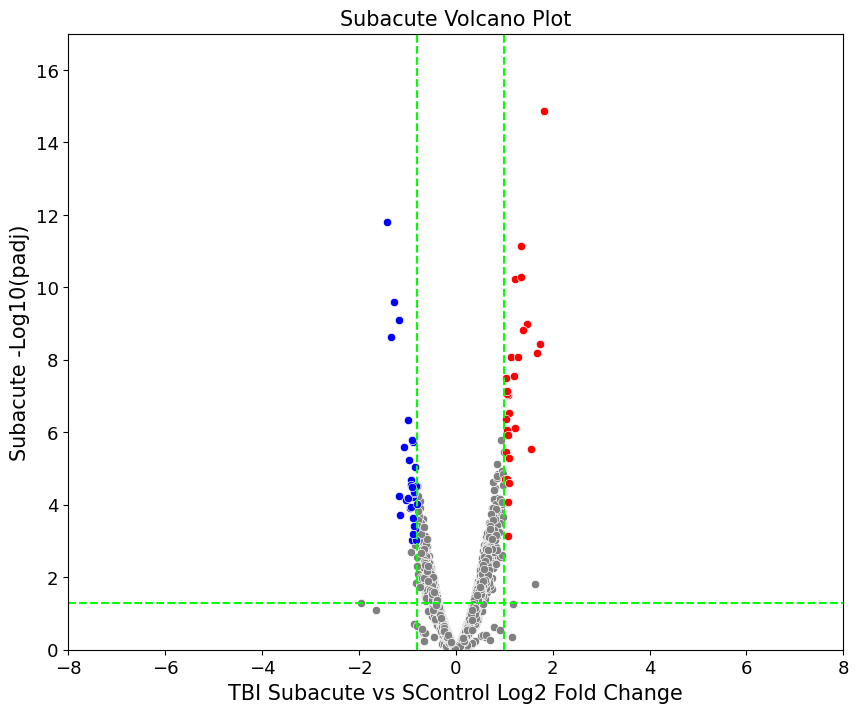

In [35]:
# 조건에 따른 색상 지정
df_cpm_subacute['color'] = 'gray'  # 기본 색상
df_cpm_subacute.loc[(df_cpm_subacute['Subacute padj'] < 0.05) & (df_cpm_subacute['TBI Subacute vs SControl Log2 fold change'] > 1.0), 'color'] = 'red'
df_cpm_subacute.loc[(df_cpm_subacute['Subacute padj'] < 0.05) & (df_cpm_subacute['TBI Subacute vs SControl Log2 fold change'] < -0.8), 'color'] = 'blue'

# Volcano plot
plt.figure(figsize=(10, 8))

# 회색 데이터 포인트 그리기
sns.scatterplot(data=df_cpm_subacute[df_cpm_subacute['color'] == 'gray'], x='TBI Subacute vs SControl Log2 fold change', y='Subacute-log10(p_value)', color='gray')
# 파란색 데이터 포인트 그리기
sns.scatterplot(data=df_cpm_subacute[df_cpm_subacute['color'] == 'red'], x='TBI Subacute vs SControl Log2 fold change', y='Subacute-log10(p_value)', color='red')
sns.scatterplot(data=df_cpm_subacute[df_cpm_subacute['color'] == 'blue'], x='TBI Subacute vs SControl Log2 fold change', y='Subacute-log10(p_value)', color='blue')
plt.xlim(-8, 8)
plt.ylim(0, 17) 


# 임계값 선 추가
plt.axhline(y=-np.log10(0.05), color='lime', linestyle='--')  # p-value 임계값 (예: 0.05)
plt.axvline(x=1, color='lime', linestyle='--')  # fold change 임계값 (예: 1)
plt.axvline(x=-0.8, color='lime', linestyle='--')  # fold change 임계값 (예: -1)


# 축 레이블과 제목 추가
plt.xlabel('TBI Subacute vs SControl Log2 Fold Change', fontsize=15)
plt.ylabel('Subacute -Log10(padj)', fontsize=15)
plt.title('Subacute Volcano Plot', fontsize=15)

# 축 눈금 폰트 크기 설정
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# 출력
plt.show()

In [36]:
# 빨간색 데이터 포인트 개수 (p-value < 0.05 그리고 Log2 fold change > 1.0)
red_count = df_cpm_subacute[(df_cpm_subacute['Subacute padj'] < 0.05) & 
                        (df_cpm_subacute['TBI Subacute vs SControl Log2 fold change'] > 1.0)].shape[0]

# 파란색 데이터 포인트 개수 (p-value < 0.05 그리고 Log2 fold change < -0.8)
blue_count = df_cpm_subacute[(df_cpm_subacute['Subacute padj'] < 0.05) & 
                         (df_cpm_subacute['TBI Subacute vs SControl Log2 fold change'] < -0.8)].shape[0]

# 결과 출력
print(f"subacute_cpm up: {red_count}")
print(f"subacute_cpm down: {blue_count}")


subacute_cpm up: 28
subacute_cpm down: 32


/tmp/ipykernel_3017139/1818804100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cpm_acute['color'] = 'gray'  # 기본 색상


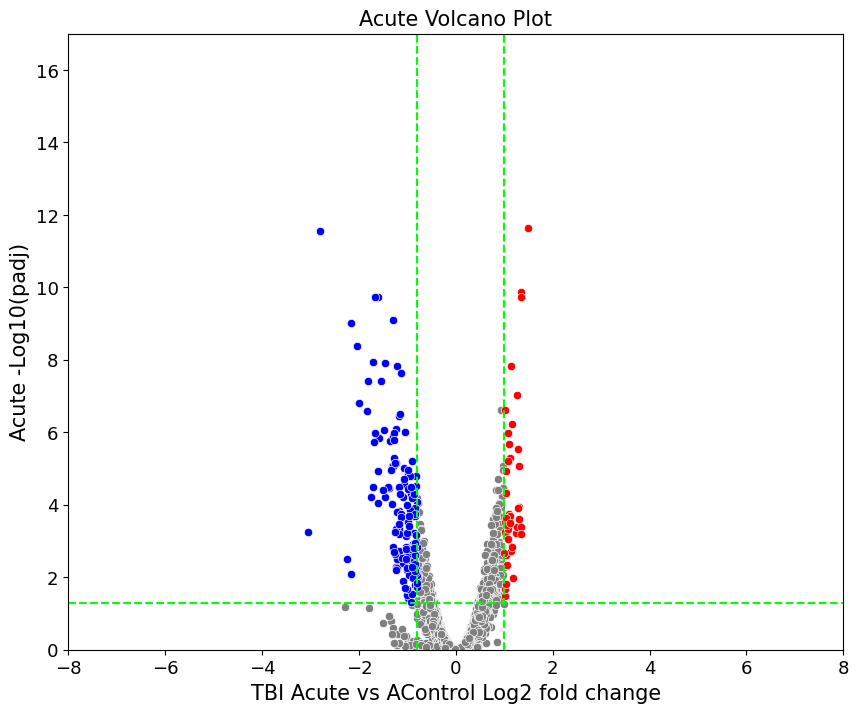

In [37]:
# 조건에 따른 색상 지정
df_cpm_acute['color'] = 'gray'  # 기본 색상
df_cpm_acute.loc[(df_cpm_acute['Acute padj'] < 0.05) & (df_cpm_acute['TBI Acute vs AControl Log2 fold change'] > 1.0), 'color'] = 'red'
df_cpm_acute.loc[(df_cpm_acute['Acute padj'] < 0.05) & (df_cpm_acute['TBI Acute vs AControl Log2 fold change'] < -0.8), 'color'] = 'blue'

# Volcano plot
plt.figure(figsize=(10, 8))

# 회색 데이터 포인트 그리기
sns.scatterplot(data=df_cpm_acute[df_cpm_acute['color'] == 'gray'], x='TBI Acute vs AControl Log2 fold change', y='Acute-log10(padj)', color='gray')
# 파란색 데이터 포인트 그리기
sns.scatterplot(data=df_cpm_acute[df_cpm_acute['color'] == 'red'], x='TBI Acute vs AControl Log2 fold change', y='Acute-log10(padj)', color='red')
sns.scatterplot(data=df_cpm_acute[df_cpm_acute['color'] == 'blue'], x='TBI Acute vs AControl Log2 fold change', y='Acute-log10(padj)', color='blue')
plt.xlim(-8, 8)
plt.ylim(0, 17) 


# 임계값 선 추가
plt.axhline(y=-np.log10(0.05), color='lime', linestyle='--')  # p-value 임계값 (예: 0.05)
plt.axvline(x=1, color='lime', linestyle='--')  # fold change 임계값 (예: 1)
plt.axvline(x=-0.8, color='lime', linestyle='--')  # fold change 임계값 (예: -1)


# 축 레이블과 제목 추가
plt.xlabel('TBI Acute vs AControl Log2 fold change', fontsize=15)
plt.ylabel('Acute -Log10(padj)', fontsize=15)
plt.title('Acute Volcano Plot', fontsize=15)

# 축 눈금 폰트 크기 설정
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# 출력
plt.show()

In [38]:
df_cpm_subacute_up = df_cpm_subacute[(df_cpm_subacute['Subacute padj'] < 0.05)  & (df_cpm_subacute['TBI Subacute vs SControl Log2 fold change'] > 1)]
df_cpm_subacute_up

,gene,TBI Subacute vs SControl Log2 fold change,Subacute pval,Subacute-log10(p_value),Subacute padj,Subacute-log10(padj),color
124,Col18a1,1.077848,9.482657e-08,7.023070,3.858443e-05,4.413588,red
130,Tubb6,1.021194,1.917607e-05,4.717240,3.435643e-03,2.463992,red
257,Lamb1,1.092577,2.904845e-07,6.536877,1.122868e-04,3.949671,red
366,Cacna1e,1.339746,7.051211e-12,11.151736,1.817097e-08,7.740622,red
817,Abca1,1.057443,8.937139e-08,7.048801,3.838501e-05,4.415838,red
930,Timp2,1.052298,1.955352e-05,4.708775,3.435643e-03,2.463992,red
1144,Dcn,1.086066,7.348773e-04,3.133785,4.000941e-02,1.397838,red
1461,Myh10,1.051976,7.351646e-08,7.133615,3.343269e-05,4.475829,red
1773,Wnt5a,1.073170,8.257355e-05,4.083159,8.991213e-03,2.046182,red
2102,Serping1,1.106451,2.462768e-05,4.608576,3.966596e-03,2.401582,red


In [39]:
df_cpm_subacute_down = df_cpm_subacute[(df_cpm_subacute['Subacute padj'] < 0.05) & (df_cpm_subacute['TBI Subacute vs SControl Log2 fold change'] < -0.8)]
df_cpm_subacute_down

,gene,TBI Subacute vs SControl Log2 fold change,Subacute pval,Subacute-log10(p_value),Subacute padj,Subacute-log10(padj),color
305,Rabac1,-0.800770,3.083934e-05,4.510895,4.584979e-03,2.338663,blue
526,Crip1,-1.074240,2.512250e-06,5.599937,6.697311e-04,3.174100,blue
1216,Ptprr,-1.007034,6.986545e-05,4.155738,8.183785e-03,2.087046,blue
1659,Marveld2,-1.020903,7.270086e-05,4.138460,8.388811e-03,2.076300,blue
1913,Emp2,-0.883580,6.281695e-05,4.201923,8.025189e-03,2.095545,blue
2414,Rnaseh2c,-0.847814,4.786244e-04,3.320005,2.936703e-02,1.532140,blue
2523,Alas2,-0.915515,2.118657e-05,4.673939,3.560725e-03,2.448462,blue
2718,Ormdl1,-0.878766,2.267201e-04,3.644510,1.735419e-02,1.760596,blue
3067,Mall,-1.177342,5.674443e-05,4.246077,7.435444e-03,2.128693,blue
3099,Stmn2,-0.899858,9.236403e-04,3.034497,4.462914e-02,1.350381,blue


In [40]:
df_cpm_acute_up = df_cpm_acute[(df_cpm_acute['Acute padj'] < 0.05)  & (df_cpm_acute['TBI Acute vs AControl Log2 fold change'] > 1)]
df_cpm_acute_up

,gene,TBI Acute vs AControl Log2 fold change,Acute pval,Acute-log10(p_value),Acute padj,Acute-log10(padj),color
23,Tpd52l1,1.020446,2.139087e-03,2.669771,3.267912e-02,1.485730,red
25,Alox12,1.008305,1.016626e-05,4.992839,5.503488e-04,3.259362,red
63,Car4,1.046605,4.333675e-07,6.363144,4.744772e-05,4.323785,red
266,Apoe,1.025980,4.616892e-06,5.335650,3.007848e-04,3.521744,red
947,Pltp,1.238663,1.131890e-05,4.946196,5.948457e-04,3.225596,red
1216,Ptprr,1.076931,4.063370e-09,8.391114,1.067718e-06,5.971543,red
1562,Degs2,1.051257,6.377043e-06,5.195381,3.779717e-04,3.422541,red
1586,Edn1,1.352788,5.229508e-14,13.281539,1.374140e-10,9.861969,red
2005,Tfrc,1.114600,2.575425e-08,7.589151,5.205660e-06,5.283524,red
2166,Xdh,1.070919,1.835001e-05,4.736364,8.929206e-04,3.049187,red


In [41]:
df_cpm_acute_down = df_cpm_acute[(df_cpm_acute['Acute padj'] < 0.05)  & (df_cpm_acute['TBI Acute vs AControl Log2 fold change'] < -0.8)]
df_cpm_acute_down

,gene,TBI Acute vs AControl Log2 fold change,Acute pval,Acute-log10(p_value),Acute padj,Acute-log10(padj),color
35,Galnt1,-1.164704,1.868899e-06,5.728414,1.473253e-04,3.831723,blue
42,Itga5,-0.880544,4.596624e-07,6.337561,4.896647e-05,4.310101,blue
130,Tubb6,-2.157709,9.793633e-13,12.009056,9.650401e-10,9.015455,blue
131,Meox1,-1.204310,2.033280e-06,5.691803,1.571407e-04,3.803711,blue
205,Ipo4,-1.065349,5.950860e-08,7.225420,9.773047e-06,5.009970,blue
...,...,...,...,...,...,...,...
7166,Ifitm2,-0.867466,3.666874e-05,4.435704,1.537552e-03,2.813170,blue
7245,Pgk1,-1.154255,8.653139e-10,9.062826,3.100577e-07,6.508557,blue
7604,Ecscr,-1.816047,7.597331e-11,10.119339,3.936218e-08,7.404921,blue
7659,Arrdc3,-1.142152,4.788092e-07,6.319838,4.966385e-05,4.303960,blue


In [68]:
cpm_subacute_up_list = df_cpm_subacute_up['gene'].to_list()
cpm_subacute_down_list = df_cpm_subacute_down['gene'].to_list()
cpm_acute_up_list = df_cpm_acute_up['gene'].to_list()
cpm_acute_down_list = df_cpm_acute_down['gene'].to_list()

with open('2.cpm_subacute_up_deg_list.txt', 'w') as file:
    for item in cpm_subacute_up_list:
        file.write(f"{item}\n")

with open('2.cpm_subacute_down_deg_list.txt', 'w') as file:
    for item in cpm_subacute_down_list:
        file.write(f"{item}\n")

with open('2.cpm_acute_up_deg_list.txt', 'w') as file:
    for item in cpm_acute_up_list:
        file.write(f"{item}\n")

with open('2.cpm_acute_down_deg_list.txt', 'w') as file:
    for item in cpm_acute_down_list:
        file.write(f"{item}\n")

# pvalue

cpm 적용 X

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

up_deg = df_subacute[(df_subacute['Subacute padj'] < 0.05) & (df_subacute['TBI Subacute vs SControl Log2 fold change'] > 1.0)]
down_deg = df_subacute[(df_subacute['Subacute padj'] < 0.05) & (df_subacute['TBI Subacute vs SControl Log2 fold change'] < -0.8)]
output_up = pd.read_csv('1.output_subacute_up.txt', sep='\t', header=None, names=['gene', 'score'])
output_down = pd.read_csv('1.output_subacute_down.txt', sep='\t', header=None, names=['gene', 'score'])

merged_up = up_deg.merge(output_up, left_on='gene', right_on='gene')
merged_down = down_deg.merge(output_down, left_on='gene', right_on='gene')

merged_up


,gene,TBI Subacute vs SControl Log2 fold change,Subacute pval,Subacute-log10(p_value),Subacute padj,Subacute-log10(padj),color,score
0,Dbh,7.165736,6.749045e-10,9.170758,2.240836e-07,6.649590,red,0.010009
1,Cox4i2,1.031619,8.574065e-04,3.066813,3.322507e-02,1.478534,red,0.010000
2,Ptprr,1.038708,8.934549e-05,4.048927,5.932946e-03,2.226730,red,0.010000
3,Marveld2,1.046147,1.833015e-04,3.736834,1.018195e-02,1.992169,red,0.010000
4,Selenow,1.023931,3.731215e-05,4.428150,2.899432e-03,2.537687,red,0.010000
5,Dsp,2.362668,1.467348e-09,8.833467,4.449279e-07,6.351710,red,0.010000
6,Dhcr7,1.012195,1.070794e-03,2.970294,3.925441e-02,1.406111,red,0.010000
7,Hba-a2,1.367927,1.169610e-09,8.931959,3.635496e-07,6.439436,red,0.010000
8,Hba-a1,1.309520,5.403767e-11,10.267303,2.392231e-08,7.621197,red,0.010000


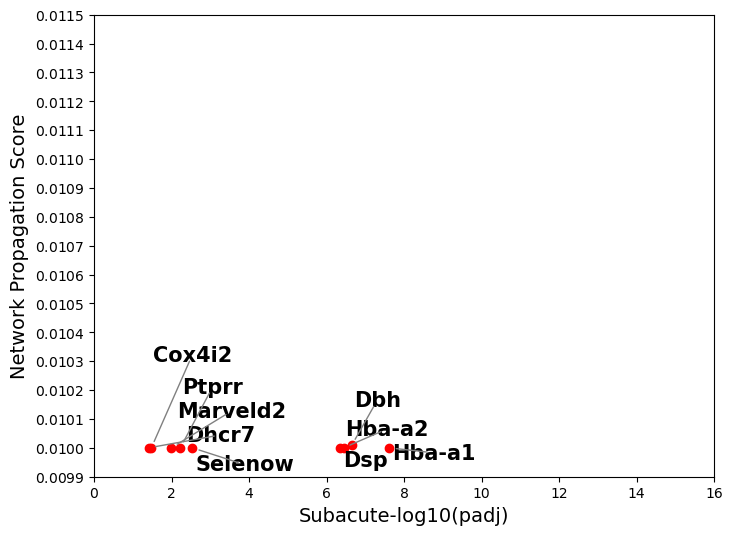

In [125]:
import matplotlib.pyplot as plt
from adjustText import adjust_text
import matplotlib.ticker as ticker

plt.figure(figsize=(8, 6))
plt.scatter(merged_up['Subacute-log10(padj)'], merged_up['score'], color='red')

# x축과 y축 레이블 설정
plt.xlabel('Subacute-log10(padj)', fontsize=14)
plt.ylabel('Network Propagation Score', fontsize=14)

# # x축과 y축 범위 통일
plt.xlim(0, 16)

# 공통 y축 범위 설정
y_min = 0.0099
y_max = 0.0115

# y축 범위 설정
plt.ylim(y_min, y_max)

# y축 눈금 설정
plt.yticks(np.arange(y_min, y_max + 0.0001, 0.0001))

# y축 숫자 형식 설정 (지수 표기법 비활성화)
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='plain', axis='y')  # 지수 표기법 비활성화
ax.yaxis.get_major_formatter().set_useOffset(False)

# 상위 10개 유전자에 라벨 추가
top_genes = merged_up.nlargest(10, 'score')
texts = []

for i, row in top_genes.iterrows():
    texts.append(plt.text(row['Subacute-log10(padj)'], row['score'], row['gene'], 
                          fontsize=15, color='black', fontweight='bold'))

# 텍스트 간격 자동 조정 및 화살표 조정
adjust_text(texts, 
            arrowprops=dict(arrowstyle='-', color='gray', shrinkA=5, shrinkB=5), 
            only_move={'points':'y', 'text':'y'},  # y축 방향으로만 이동 허용
            expand_text=(1.5, 1.5),  # 텍스트와 포인트 간의 간격 조정
            force_text=(0.5, 0.5))  # 텍스트를 더 강하게 이동시킴

plt.show()




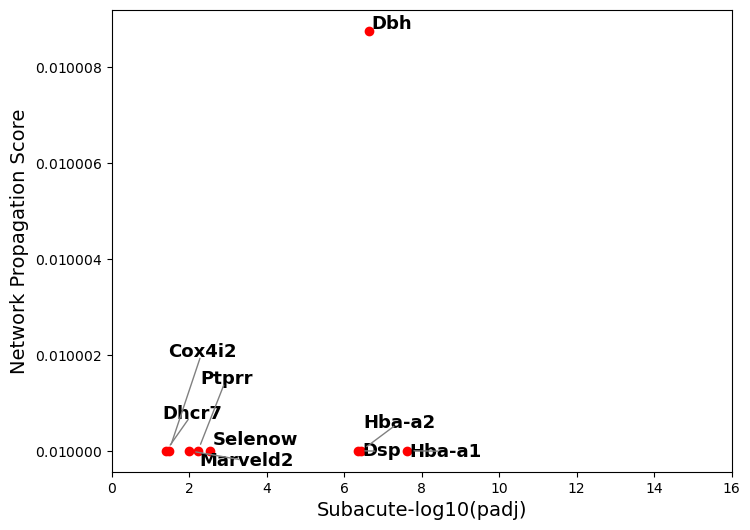

In [127]:
import matplotlib.pyplot as plt
from adjustText import adjust_text
import matplotlib.ticker as ticker

plt.figure(figsize=(8, 6))
plt.scatter(merged_up['Subacute-log10(padj)'], merged_up['score'], color='red')

# x축과 y축 레이블 설정
plt.xlabel('Subacute-log10(padj)', fontsize=14)
plt.ylabel('Network Propagation Score', fontsize=14)

plt.xlim(0, 16)

# y축 숫자 형식 설정 (지수 표기법 비활성화)
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='plain', axis='y')  # 지수 표기법 비활성화
ax.yaxis.get_major_formatter().set_useOffset(False)

# 상위 10개 유전자에 라벨 추가
top_genes = merged_up.nlargest(10, 'score')
texts = []

for i, row in top_genes.iterrows():
    texts.append(plt.text(row['Subacute-log10(padj)'], row['score'], row['gene'], 
                          fontsize=13, color='black', fontweight='bold'))

# 텍스트 간격 자동 조정 및 화살표 조정
adjust_text(texts, 
            arrowprops=dict(arrowstyle='-', color='gray', shrinkA=5, shrinkB=5), 
            only_move={'points':'y', 'text':'y'},  # y축 방향으로만 이동 허용
            expand_text=(1.5, 1.5),  # 텍스트와 포인트 간의 간격 조정
            force_text=(0.5, 0.5))  # 텍스트를 더 강하게 이동시킴

plt.show()

In [112]:
top_subacute_up = top_genes["gene"]
top_subacute_up

0         Dbh
5         Dsp
1      Cox4i2
7      Hba-a2
2       Ptprr
6       Dhcr7
3    Marveld2
4     Selenow
8      Hba-a1
Name: gene, dtype: object

In [48]:
merged_down[merged_down['score'] >= 0.01]['gene']

0        Mmp14
1       S100a6
2       Col6a1
3        Timp1
4      Col18a1
        ...   
178     Csf2rb
179    Csf2rb2
180        C4b
181      Naip6
182      Naip2
Name: gene, Length: 183, dtype: object

In [49]:
merged_down[merged_down['score'] >= 0.01]['gene'].tolist()

['Mmp14',
 'S100a6',
 'Col6a1',
 'Timp1',
 'Col18a1',
 'Tubb6',
 'Col1a1',
 'Foxm1',
 'Vwf',
 'Ncan',
 'Lcp2',
 'Il17ra',
 'Lamb1',
 'Kif20a',
 'Cacna1e',
 'Aqp1',
 'Cd44',
 'Kit',
 'Prg4',
 'Fblim1',
 'Fbln1',
 'Itih3',
 'Pole',
 'Bmp7',
 'Kif11',
 'Aldh1a2',
 'Abca1',
 'Sdc4',
 'Brca1',
 'Timp2',
 'Birc5',
 'Eya2',
 'Sema6a',
 'Dcn',
 'Cdk1',
 'Igf1',
 'Avpr1a',
 'Dock2',
 'Col6a2',
 'Hmmr',
 'Upp1',
 'Pxdn',
 'Itgb3',
 'Myh10',
 'Top2a',
 'Gfap',
 'Serpina3n',
 'Lgmn',
 'Sfrp4',
 'Vcan',
 'Wnt5a',
 'Diaph3',
 'Pbk',
 'Bmp1',
 'Myc',
 'Alcam',
 'Serpind1',
 'Robo1',
 'Runx1',
 'Racgap1',
 'Serping1',
 'Cdca3',
 'Thbs2',
 'Sgo1',
 'Ndc80',
 'Cyp1b1',
 'Sting1',
 'Dpysl3',
 'Lox',
 'Fth1',
 'Msr1',
 'Loxl4',
 'Il6',
 'Nrp2',
 'Col5a2',
 'Col3a1',
 'Il1r1',
 'Igfbp5',
 'Fn1',
 'Selp',
 'Sele',
 'Cenpf',
 'Nek2',
 'Lcn2',
 'Col5a1',
 'Lhx6',
 'Fbn1',
 'Knl1',
 'Knstrn',
 'Dusp2',
 'Bub1',
 'Tpx2',
 'Ect2',
 'Ccna2',
 'Postn',
 'Tlr2',
 'Mmp16',
 'Cdca8',
 'Sema3a',
 'Tnfrsf9',
 'Sgcb',
 

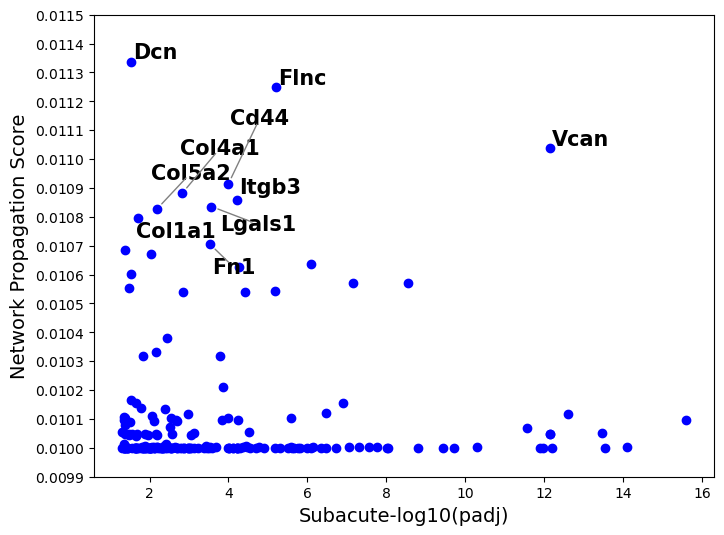

In [115]:
plt.figure(figsize=(8, 6))
plt.scatter(merged_down['Subacute-log10(padj)'], merged_down['score'], color='blue')

# x축과 y축 레이블 설정
plt.xlabel('Subacute-log10(padj)', fontsize=14)
plt.ylabel('Network Propagation Score', fontsize=14)

# 공통 y축 범위 설정
y_min = 0.0099
y_max = 0.0115
# y축 범위 설정
plt.ylim(y_min, y_max)

# y축 눈금 설정
plt.yticks(np.arange(y_min, y_max + 0.0001, 0.0001))

# y축 숫자 형식 설정 (지수 표기법 비활성화)
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='plain', axis='y')  # 지수 표기법 비활성화
ax.yaxis.get_major_formatter().set_useOffset(False)

# 상위 10개 유전자에 라벨 추가
top_genes = merged_down.nlargest(10, 'score')
texts = []

for i, row in top_genes.iterrows():
    texts.append(plt.text(row['Subacute-log10(padj)'], row['score'], row['gene'], 
                          fontsize=15, color='black', fontweight='bold'))

# 텍스트 간격 자동 조정 및 화살표 조정
adjust_text(texts, 
            arrowprops=dict(arrowstyle='-', color='gray', shrinkA=5, shrinkB=5), 
            only_move={'points':'y', 'text':'y'},  # y축 방향으로만 이동 허용
            expand_text=(1.5, 1.5),  # 텍스트와 포인트 간의 간격 조정
            force_text=(0.5, 0.5))  # 텍스트를 더 강하게 이동시킴

plt.show()

In [116]:
top_subacute_down = top_genes["gene"]
top_subacute_down

35        Dcn
191      Flnc
52       Vcan
17       Cd44
122    Col4a1
44      Itgb3
190    Lgals1
81     Col5a2
6      Col1a1
85        Fn1
Name: gene, dtype: object

In [45]:
merged_down["score"] >= 0.01

0      True
1      True
2      True
3      True
4      True
       ... 
178    True
179    True
180    True
181    True
182    True
Name: score, Length: 183, dtype: bool

In [50]:
up_deg = df_acute[(df_acute['Acute padj'] < 0.05) & (df_acute['TBI Acute vs AControl Log2 fold change'] > 1.0)]
down_deg = df_acute[(df_acute['Acute padj'] < 0.05) & (df_acute['TBI Acute vs AControl Log2 fold change'] < -0.8)]
output_up = pd.read_csv('1.output_acute_up.txt', sep='\t', header=None, names=['gene', 'score'])
output_down = pd.read_csv('1.output_acute_down.txt', sep='\t', header=None, names=['gene', 'score'])

merged_up_acute = up_deg.merge(output_up, left_on='gene', right_on='gene')
merged_down_acute = down_deg.merge(output_down, left_on='gene', right_on='gene')

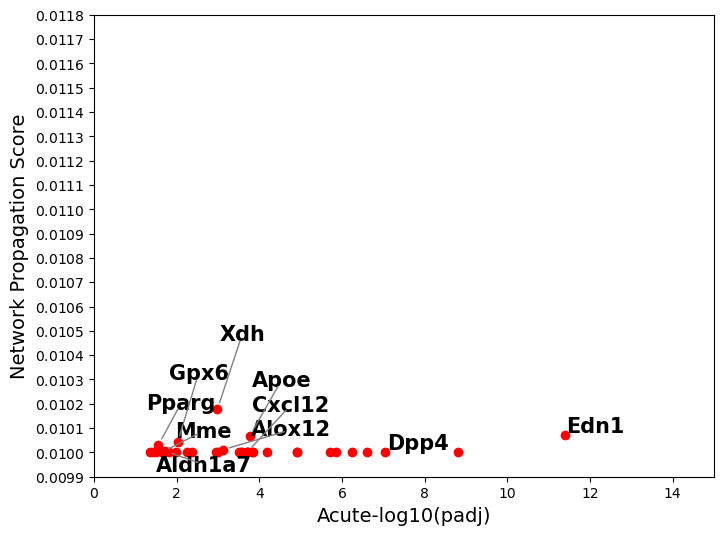

In [134]:
plt.figure(figsize=(8, 6))
plt.scatter(merged_up_acute['Acute-log10(padj)'], merged_up_acute['score'], color='red')

# x축과 y축 레이블 설정
plt.xlabel('Acute-log10(padj)', fontsize=14)
plt.ylabel('Network Propagation Score', fontsize=14)

# # x축과 y축 범위 통일
plt.xlim(0, 15)

# 공통 y축 범위 설정
y_min = 0.0099
y_max = 0.01175
# y축 범위 설정
plt.ylim(y_min, y_max)

# y축 눈금 설정
plt.yticks(np.arange(y_min, y_max + 0.0001, 0.0001))

# y축 숫자 형식 설정 (지수 표기법 비활성화)
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='plain', axis='y')  # 지수 표기법 비활성화
ax.yaxis.get_major_formatter().set_useOffset(False)

# 상위 10개 유전자에 라벨 추가
top_genes = merged_up_acute.nlargest(10, 'score')
texts = []

for i, row in top_genes.iterrows():
    texts.append(plt.text(row['Acute-log10(padj)'], row['score'], row['gene'], 
                          fontsize=15, color='black', fontweight='bold'))

# 텍스트 간격 자동 조정 및 화살표 조정
adjust_text(texts, 
            arrowprops=dict(arrowstyle='-', color='gray', shrinkA=5, shrinkB=5), 
            only_move={'points':'y', 'text':'y'},  # y축 방향으로만 이동 허용
            expand_text=(1.5, 1.5),  # 텍스트와 포인트 간의 간격 조정
            force_text=(0.5, 0.5))  # 텍스트를 더 강하게 이동시킴

plt.show()

In [120]:
top_acute_up = top_genes["gene"]
top_acute_up

15        Xdh
11       Edn1
3        Apoe
4        Gpx6
2       Pparg
1      Alox12
16    Aldh1a7
26       Dpp4
19        Mme
33     Cxcl12
Name: gene, dtype: object

In [53]:
merged_up_acute[merged_up_acute['score'] >= 0.01]['gene'].tolist()

['Tpd52l1',
 'Alox12',
 'Apoe',
 'Gpx6',
 'Scube2',
 'Pltp',
 'Ptprr',
 'Hcn2',
 'Pomc',
 'Degs2',
 'Edn1',
 'Ctnnd2',
 'Col14a1',
 'Tfrc',
 'Xdh',
 'Aldh1a7',
 'Slc9a2',
 'Edn3',
 'Mme',
 'Hmgcs2',
 'Alpl',
 'Sema3c',
 'Prom1',
 'Mylpf',
 'Sgpp2',
 'Dpp4',
 'Tgfb2',
 'Ltbp4',
 'Notum',
 'Fgfbp1',
 'Fam181b',
 'Cbx7',
 'Cxcl12',
 'Jund']

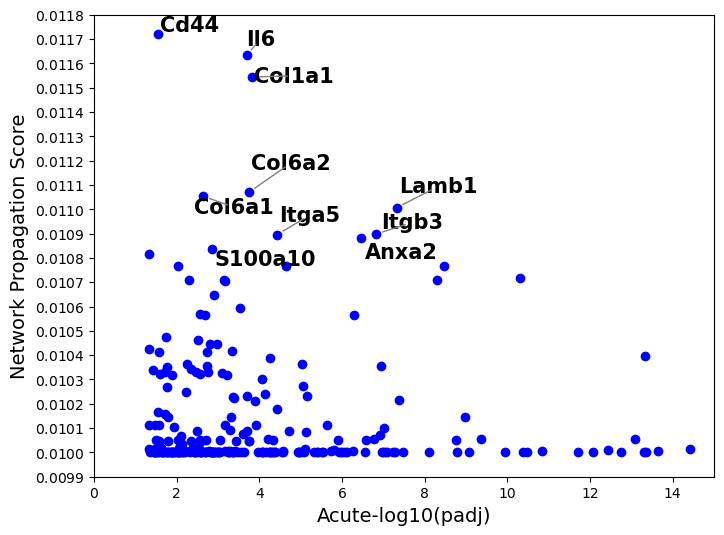

In [136]:
plt.figure(figsize=(8, 6))
plt.scatter(merged_down_acute['Acute-log10(padj)'], merged_down_acute['score'], color='blue')

# x축과 y축 레이블 설정
plt.xlabel('Acute-log10(padj)', fontsize=14)
plt.ylabel('Network Propagation Score', fontsize=14)

plt.xlim(0, 15)

# 공통 y축 범위 설정
y_min = 0.0099
y_max = 0.01175
# y축 범위 설정
plt.ylim(y_min, y_max)

# y축 눈금 설정
plt.yticks(np.arange(y_min, y_max + 0.0001, 0.0001))

# y축 숫자 형식 설정 (지수 표기법 비활성화)
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='plain', axis='y')  # 지수 표기법 비활성화
ax.yaxis.get_major_formatter().set_useOffset(False)

# 상위 10개 유전자에 라벨 추가
top_genes = merged_down_acute.nlargest(10, 'score')
texts = []

for i, row in top_genes.iterrows():
    texts.append(plt.text(row['Acute-log10(padj)'], row['score'], row['gene'], 
                          fontsize=15, color='black', fontweight='bold'))

# 텍스트 간격 자동 조정 및 화살표 조정
adjust_text(texts, 
            arrowprops=dict(arrowstyle='-', color='gray', shrinkA=5, shrinkB=5), 
            only_move={'points':'y', 'text':'y'},  # y축 방향으로만 이동 허용
            expand_text=(1.5, 1.5),  # 텍스트와 포인트 간의 간격 조정
            force_text=(0.5, 0.5))  # 텍스트를 더 강하게 이동시킴

plt.show()

In [130]:
top_acute_down = top_genes["gene"]
top_acute_down

28        Cd44
102        Il6
11      Col1a1
54      Col6a2
6       Col6a1
19       Lamb1
62       Itgb3
1        Itga5
173      Anxa2
213    S100a10
Name: gene, dtype: object

In [57]:
merged_down_acute[merged_down_acute['score'] >= 0.01]['gene'].tolist()

['Pemt',
 'Itga5',
 'Polr3d',
 'Dbh',
 'Mmp14',
 'S100a6',
 'Col6a1',
 'Timp1',
 'Uhrf1',
 'Rrp15',
 'Tubb6',
 'Col1a1',
 'Fkbp10',
 'Eef1e1',
 'Ltbp2',
 'Ipo4',
 'Lcp2',
 'Mcm2',
 'Il17ra',
 'Lamb1',
 'Fkbp11',
 'Ercc1',
 'Man1a',
 'Utp20',
 'Aqp1',
 'Pgf',
 'Cd44',
 'Nid1',
 'Il27ra',
 'Mthfd2',
 'Kit',
 'Ampd3',
 'Prg4',
 'Fbln1',
 'Srm',
 'Itih3',
 'Aprt',
 'Bmp7',
 'Kcnq1',
 'Bcr',
 'Odc1',
 'Pabpc4',
 'Aldh1a2',
 'Sdc4',
 'Eya2',
 'Dcn',
 'Ahi1',
 'Igf1',
 'Ddx21',
 'Ppa1',
 'Pno1',
 'Avpr1a',
 'Col6a2',
 'Gfpt2',
 'Upp1',
 'Igfbp3',
 'Pdia6',
 'Rgs9',
 'Pxdn',
 'Ccl11',
 'Itgb3',
 'Top2a',
 'Mthfd1',
 'Bdkrb2',
 'Serpina3n',
 'Lgmn',
 'Pfkp',
 'Traf3',
 'Sfrp4',
 'Vcan',
 'Nid2',
 'Slc39a14',
 'Bmp1',
 'Uchl3',
 'Ednrb',
 'Myc',
 'Rpap3',
 'Apod',
 'Alcam',
 'Serpind1',
 'Hcls1',
 'Robo1',
 'Igfbp6',
 'Serping1',
 'Vegfa',
 'Epb41l3',
 'Cyp1b1',
 'Fkbp5',
 'Slc39a6',
 'Sting1',
 'Dpysl3',
 'Lox',
 'Psat1',
 'Ctsw',
 'Aldh18a1',
 'Msr1',
 'Gsto1',
 'Loxl4',
 'Got1',
 'Il6',
 'Eya

cpm 적용 O

In [58]:
up_deg = df_cpm_subacute[(df_cpm_subacute['Subacute padj'] < 0.05) & (df_cpm_subacute['TBI Subacute vs SControl Log2 fold change'] > 1.0)]
down_deg = df_cpm_subacute[(df_cpm_subacute['Subacute padj'] < 0.05) & (df_cpm_subacute['TBI Subacute vs SControl Log2 fold change'] < -0.8)]
output_up = pd.read_csv('2.output_cpm_subacute_up.txt', sep='\t', header=None, names=['gene', 'score'])
output_down = pd.read_csv('2.output_cpm_subacute_down.txt', sep='\t', header=None, names=['gene', 'score'])

merged_up_cpm_subacute = up_deg.merge(output_up, left_on='gene', right_on='gene')
merged_down_cpm_subacute = down_deg.merge(output_down, left_on='gene', right_on='gene')

merged_up_cpm_subacute

,gene,TBI Subacute vs SControl Log2 fold change,Subacute pval,Subacute-log10(p_value),Subacute padj,Subacute-log10(padj),color,score
0,Col18a1,1.077848,9.482657e-08,7.023070,3.858443e-05,4.413588,red,0.010005
1,Tubb6,1.021194,1.917607e-05,4.717240,3.435643e-03,2.463992,red,0.010000
2,Lamb1,1.092577,2.904845e-07,6.536877,1.122868e-04,3.949671,red,0.010027
3,Cacna1e,1.339746,7.051211e-12,11.151736,1.817097e-08,7.740622,red,0.010000
4,Abca1,1.057443,8.937139e-08,7.048801,3.838501e-05,4.415838,red,0.010000
5,Timp2,1.052298,1.955352e-05,4.708775,3.435643e-03,2.463992,red,0.010000
6,Dcn,1.086066,7.348773e-04,3.133785,4.000941e-02,1.397838,red,0.010017
7,Myh10,1.051976,7.351646e-08,7.133615,3.343269e-05,4.475829,red,0.010000
8,Wnt5a,1.073170,8.257355e-05,4.083159,8.991213e-03,2.046182,red,0.010000
9,Serping1,1.106451,2.462768e-05,4.608576,3.966596e-03,2.401582,red,0.010000


<function matplotlib.pyplot.show(close=None, block=None)>

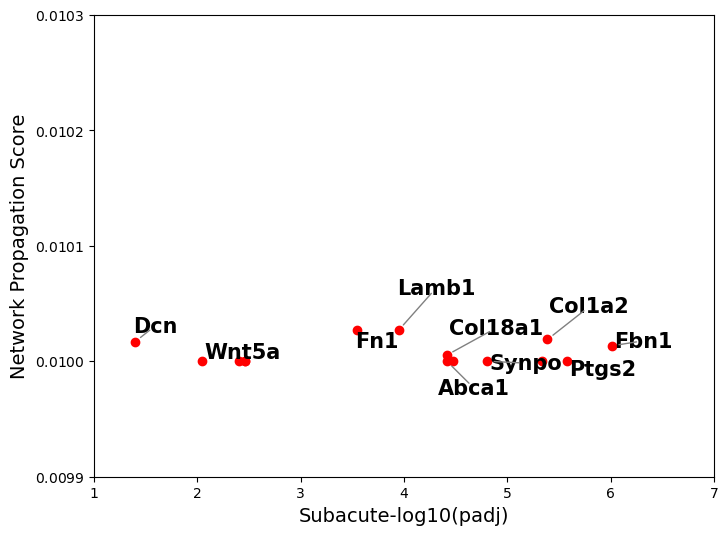

In [151]:
plt.figure(figsize=(8, 6))
plt.scatter(merged_up_cpm_subacute['Subacute-log10(padj)'], merged_up_cpm_subacute['score'], color='red')

# x축과 y축 레이블 설정
plt.xlabel('Subacute-log10(padj)', fontsize=14)
plt.ylabel('Network Propagation Score', fontsize=14)

# # x축과 y축 범위 통일
plt.xlim(1, 7)

# 공통 y축 범위 설정
y_min = 0.0099
y_max = 0.0103

# y축 범위 설정
plt.ylim(y_min, y_max)

# y축 눈금 설정
plt.yticks(np.arange(y_min, y_max + 0.0001, 0.0001))

# y축 숫자 형식 설정 (지수 표기법 비활성화)
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='plain', axis='y')  # 지수 표기법 비활성화
ax.yaxis.get_major_formatter().set_useOffset(False)

# 상위 10개 유전자에 라벨 추가
top_genes = merged_up_cpm_subacute.nlargest(10, 'score')
texts = []

for i, row in top_genes.iterrows():
    texts.append(plt.text(row['Subacute-log10(padj)'], row['score'], row['gene'], 
                          fontsize=15, color='black', fontweight='bold'))

# 텍스트 간격 자동 조정 및 화살표 조정
adjust_text(texts, 
            arrowprops=dict(arrowstyle='-', color='gray', shrinkA=5, shrinkB=5), 
            only_move={'points':'y', 'text':'y'},  # y축 방향으로만 이동 허용
            expand_text=(1.5, 1.5),  # 텍스트와 포인트 간의 간격 조정
            force_text=(0.5, 0.5))  # 텍스트를 더 강하게 이동시킴

plt.show

In [140]:
top_subacute_up_cpm = top_genes["gene"]
top_subacute_up_cpm

10        Fn1
2       Lamb1
12     Col1a2
6         Dcn
11       Fbn1
0     Col18a1
13      Ptgs2
8       Wnt5a
4       Abca1
14      Synpo
Name: gene, dtype: object

In [60]:
merged_up_cpm_subacute[merged_up_cpm_subacute['score'] >= 0.01]['gene'].tolist()

['Col18a1',
 'Tubb6',
 'Lamb1',
 'Cacna1e',
 'Abca1',
 'Timp2',
 'Dcn',
 'Myh10',
 'Wnt5a',
 'Serping1',
 'Fn1',
 'Fbn1',
 'Col1a2',
 'Ptgs2',
 'Synpo',
 'Map1b']

<function matplotlib.pyplot.show(close=None, block=None)>

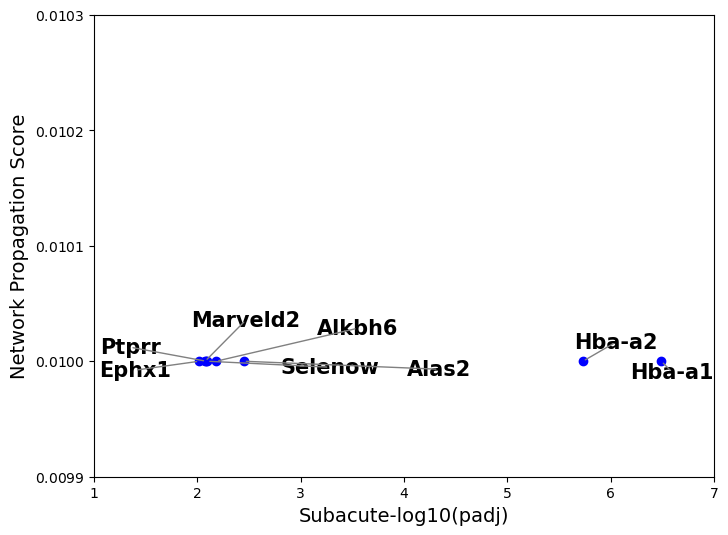

In [160]:
plt.figure(figsize=(8, 6))
plt.scatter(merged_down_cpm_subacute['Subacute-log10(padj)'], merged_down_cpm_subacute['score'], color='blue')

# x축과 y축 레이블 설정
plt.xlabel('Subacute-log10(padj)', fontsize=14)
plt.ylabel('Network Propagation Score', fontsize=14)

# # x축과 y축 범위 통일
plt.xlim(1, 7)

# 공통 y축 범위 설정
y_min = 0.0099
y_max = 0.0103

# y축 범위 설정
plt.ylim(y_min, y_max)

# y축 눈금 설정
plt.yticks(np.arange(y_min, y_max + 0.0001, 0.0001))

# y축 숫자 형식 설정 (지수 표기법 비활성화)
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='plain', axis='y')  # 지수 표기법 비활성화
ax.yaxis.get_major_formatter().set_useOffset(False)

# 상위 10개 유전자에 라벨 추가
top_genes = merged_down_cpm_subacute.nlargest(10, 'score')
texts = []

for i, row in top_genes.iterrows():
    texts.append(plt.text(row['Subacute-log10(padj)'], row['score'], row['gene'], 
                          fontsize=15, color='black', fontweight='bold'))

# 텍스트 간격 자동 조정 및 화살표 조정
adjust_text(texts, 
            arrowprops=dict(arrowstyle='-', color='gray'), 
            only_move={'points':'xy', 'text':'xy'},  # y축 방향으로만 이동 허용
            expand_text=(1.5, 1.5),  # 텍스트와 포인트 간의 간격 조정
            force_text=(0.5, 0.5))  # 텍스트를 더 강하게 이동시킴

plt.show

In [158]:
top_subacute_down_cpm = top_genes['gene']
top_subacute_down_cpm

0       Ptprr
1    Marveld2
2       Alas2
3       Ephx1
4     Selenow
5      Alkbh6
6      Hba-a2
7      Hba-a1
Name: gene, dtype: object

In [61]:
merged_down_cpm_subacute[merged_down_cpm_subacute['score'] >= 0.01]['gene']

0       Ptprr
1    Marveld2
2       Alas2
3       Ephx1
4     Selenow
5      Alkbh6
6      Hba-a2
7      Hba-a1
Name: gene, dtype: object

In [62]:
up_deg = df_cpm_acute[(df_cpm_acute['Acute padj'] < 0.05) & (df_cpm_acute['TBI Acute vs AControl Log2 fold change'] > 1.0)]
down_deg = df_cpm_acute[(df_cpm_acute['Acute padj'] < 0.05) & (df_cpm_acute['TBI Acute vs AControl Log2 fold change'] < -0.8)]
output_up = pd.read_csv('2.output_cpm_acute_up.txt', sep='\t', header=None, names=['gene', 'score'])
output_down = pd.read_csv('2.output_cpm_acute_down.txt', sep='\t', header=None, names=['gene', 'score'])

merged_up_acute_cpm = up_deg.merge(output_up, left_on='gene', right_on='gene')
merged_down_acute_cpm = down_deg.merge(output_down, left_on='gene', right_on='gene')

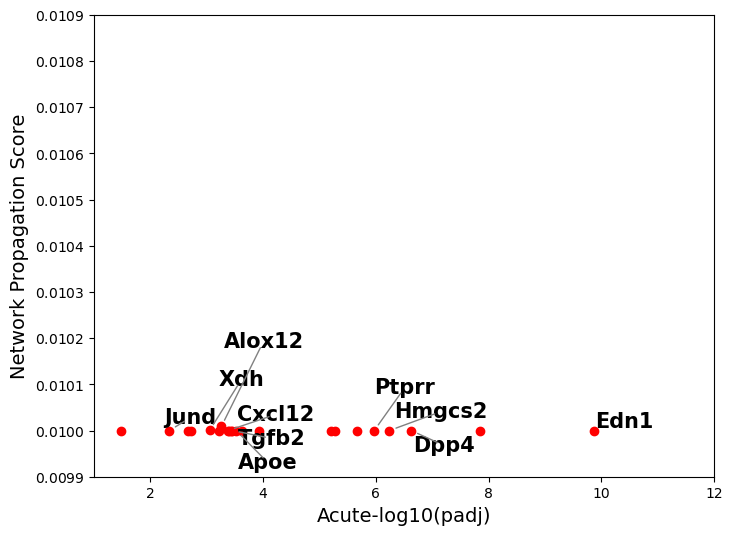

In [169]:
plt.figure(figsize=(8, 6))
plt.scatter(merged_up_acute_cpm['Acute-log10(padj)'], merged_up_acute_cpm['score'], color='red')

# x축과 y축 레이블 설정
plt.xlabel('Acute-log10(padj)', fontsize=14)
plt.ylabel('Network Propagation Score', fontsize=14)

# # x축과 y축 범위 통일
plt.xlim(1, 12)

# 공통 y축 범위 설정
y_min = 0.0099
y_max = 0.0109
# y축 범위 설정
plt.ylim(y_min, y_max)

# y축 눈금 설정
plt.yticks(np.arange(y_min, y_max + 0.0001, 0.0001))

# y축 숫자 형식 설정 (지수 표기법 비활성화)
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='plain', axis='y')  # 지수 표기법 비활성화
ax.yaxis.get_major_formatter().set_useOffset(False)

# 상위 10개 유전자에 라벨 추가
top_genes = merged_up_acute_cpm.nlargest(10, 'score')
texts = []

for i, row in top_genes.iterrows():
    texts.append(plt.text(row['Acute-log10(padj)'], row['score'], row['gene'], 
                          fontsize=15, color='black', fontweight='bold'))

# 텍스트 간격 자동 조정 및 화살표 조정
adjust_text(texts, 
            arrowprops=dict(arrowstyle='-', color='gray', shrinkA=5, shrinkB=5), 
            only_move={'points':'y', 'text':'y'},  # y축 방향으로만 이동 허용
            expand_text=(1.5, 1.5),  # 텍스트와 포인트 간의 간격 조정
            force_text=(0.5, 0.5))  # 텍스트를 더 강하게 이동시킴

plt.show()

In [170]:
top_acute_up_cpm = top_genes["gene"]
top_acute_up_cpm

1     Alox12
8        Xdh
11    Hmgcs2
6       Edn1
2       Apoe
20    Cxcl12
21      Jund
4      Ptprr
17     Tgfb2
16      Dpp4
Name: gene, dtype: object

In [66]:
merged_up_acute_cpm[merged_up_acute_cpm['score'] >= 0.01]['gene'].tolist()

['Tpd52l1',
 'Alox12',
 'Apoe',
 'Pltp',
 'Ptprr',
 'Degs2',
 'Edn1',
 'Tfrc',
 'Xdh',
 'Slc9a2',
 'Edn3',
 'Hmgcs2',
 'Alpl',
 'Sema3c',
 'Prom1',
 'Sgpp2',
 'Dpp4',
 'Tgfb2',
 'Ltbp4',
 'Cbx7',
 'Cxcl12',
 'Jund']

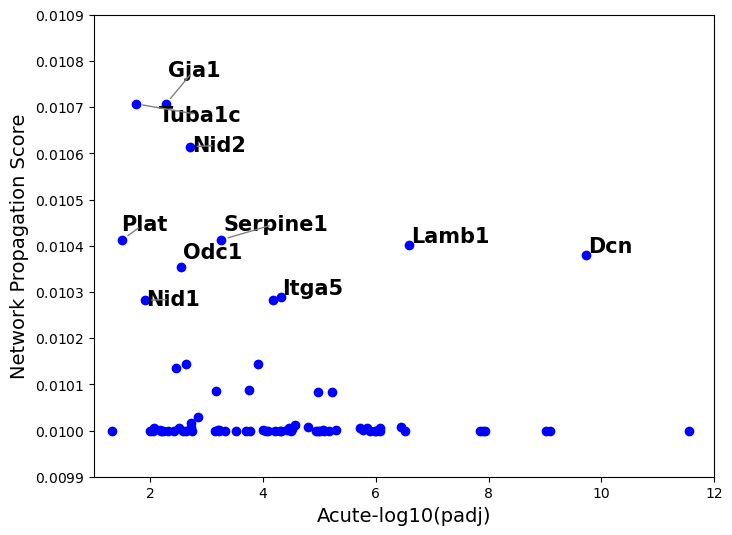

In [171]:
plt.figure(figsize=(8, 6))
plt.scatter(merged_down_acute_cpm['Acute-log10(padj)'], merged_down_acute_cpm['score'], color='blue')

# x축과 y축 레이블 설정
plt.xlabel('Acute-log10(padj)', fontsize=14)
plt.ylabel('Network Propagation Score', fontsize=14)

# # x축과 y축 범위 통일
plt.xlim(1, 12)

# 공통 y축 범위 설정
y_min = 0.0099
y_max = 0.0109
# y축 범위 설정
plt.ylim(y_min, y_max)

# y축 눈금 설정
plt.yticks(np.arange(y_min, y_max + 0.0001, 0.0001))

# y축 숫자 형식 설정 (지수 표기법 비활성화)
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='plain', axis='y')  # 지수 표기법 비활성화
ax.yaxis.get_major_formatter().set_useOffset(False)

# 상위 10개 유전자에 라벨 추가
top_genes = merged_down_acute_cpm.nlargest(10, 'score')
texts = []

for i, row in top_genes.iterrows():
    texts.append(plt.text(row['Acute-log10(padj)'], row['score'], row['gene'], 
                          fontsize=15, color='black', fontweight='bold'))

# 텍스트 간격 자동 조정 및 화살표 조정
adjust_text(texts, 
            arrowprops=dict(arrowstyle='-', color='gray', shrinkA=5, shrinkB=5), 
            only_move={'points':'y', 'text':'y'},  # y축 방향으로만 이동 허용
            expand_text=(1.5, 1.5),  # 텍스트와 포인트 간의 간격 조정
            force_text=(0.5, 0.5))  # 텍스트를 더 강하게 이동시킴

plt.show()

In [172]:
top_acute_down_cpm = top_genes["gene"]
top_acute_down_cpm

71        Gja1
64      Tuba1c
25        Nid2
59    Serpine1
51        Plat
4        Lamb1
16         Dcn
13        Odc1
0        Itga5
8         Nid1
Name: gene, dtype: object

In [68]:
merged_down_acute_cpm[merged_down_acute_cpm['score'] >= 0.01]['gene'].tolist()

['Itga5',
 'Tubb6',
 'Ipo4',
 'Mcm2',
 'Lamb1',
 'Ercc1',
 'Man1a',
 'Utp20',
 'Nid1',
 'Srm',
 'Aprt',
 'Kcnq1',
 'Bcr',
 'Odc1',
 'Pabpc4',
 'Sdc4',
 'Dcn',
 'Ahi1',
 'Ddx21',
 'Ppa1',
 'Igfbp3',
 'Pdia6',
 'Pxdn',
 'Lgmn',
 'Pfkp',
 'Nid2',
 'Rpap3',
 'Apod',
 'Alcam',
 'Serping1',
 'Slc39a6',
 'Nrp2',
 'Atic',
 'Vim',
 'Hsd17b12',
 'Sema6d',
 'Fbn1',
 'Cd93',
 'Procr',
 'Slc7a11',
 'S100a11',
 'Plpp3',
 'Pde4b',
 'Pdgfra',
 'Asns',
 'Mgp',
 'Tnfrsf1a',
 'Msn',
 'Acsl4',
 'Angpt2',
 'Col4a2',
 'Plat',
 'Fgfr1',
 'Anxa2',
 'Ptgs2',
 'Fkbp1a',
 'Kctd17',
 'Casp4',
 'Enpp1',
 'Serpine1',
 'Tlr4',
 'Pvr',
 'S100a10',
 'Synpo',
 'Tuba1c',
 'Rps2',
 'Plaur',
 'Ino80c',
 'Polr1a',
 'Heatr1',
 'Ptges',
 'Gja1',
 'Map1b',
 'Eif1a',
 'Gapdh',
 'Mdn1',
 'Pgk1']

In [175]:
import pandas as pd

# 텍스트 파일을 DataFrame으로 읽기
file_path = '1.output_subacute_up.txt'  # 파일 경로를 적절히 변경하세요
df = pd.read_csv(file_path, sep='\t', header=None, names=['gene', 'network_propagation_score'])

# 두 번째 열(value)을 기준으로 내림차순 정렬하고 상위 10개 선택
top_10_subacute_up = df.sort_values(by='network_propagation_score', ascending=False).head(10)

# 결과 출력
print(top_10_subacute_up)


          gene  network_propagation_score
1736       Dbh                   0.010009
1979       Dsp                   0.010000
1461    Cox4i2                   0.010000
3000    Hba-a2                   0.010000
5624     Ptprr                   0.010000
1819     Dhcr7                   0.010000
6237   Selenow                   0.010000
2999    Hba-a1                   0.010000
3956  Marveld2                   0.010000
4872       Pah                   0.000593


In [176]:
# 텍스트 파일을 DataFrame으로 읽기
file_path = '1.output_subacute_down.txt'  # 파일 경로를 적절히 변경하세요
df = pd.read_csv(file_path, sep='\t', header=None, names=['gene', 'network_propagation_score'])

# 두 번째 열(value)을 기준으로 내림차순 정렬하고 상위 10개 선택
top_10_subacute_down = df.sort_values(by='network_propagation_score', ascending=False).head(10)

# 결과 출력
print(top_10_subacute_down)

        gene  network_propagation_score
1749     Dcn                   0.011338
2467    Flnc                   0.011249
7562    Vcan                   0.011037
1087    Cd44                   0.010914
1410  Col4a1                   0.010882
3449   Itgb3                   0.010859
3751  Lgals1                   0.010836
1417  Col5a2                   0.010827
1405  Col1a1                   0.010797
2481     Fn1                   0.010705


In [177]:
# 텍스트 파일을 DataFrame으로 읽기
file_path = '1.output_acute_up.txt'  # 파일 경로를 적절히 변경하세요
df = pd.read_csv(file_path, sep='\t', header=None, names=['gene', 'network_propagation_score'])

# 두 번째 열(value)을 기준으로 내림차순 정렬하고 상위 10개 선택
top_10_acute_up = df.sort_values(by='network_propagation_score', ascending=False).head(10)

# 결과 출력
print(top_10_acute_up)

         gene  network_propagation_score
7703      Xdh                   0.010178
2042     Edn1                   0.010071
436      Apoe                   0.010066
2826     Gpx6                   0.010041
5342    Pparg                   0.010030
304    Alox12                   0.010011
276   Aldh1a7                   0.010005
1951     Dpp4                   0.010002
4130      Mme                   0.010002
1616   Cxcl12                   0.010001


In [178]:
# 텍스트 파일을 DataFrame으로 읽기
file_path = '1.output_acute_down.txt'  # 파일 경로를 적절히 변경하세요
df = pd.read_csv(file_path, sep='\t', header=None, names=['gene', 'network_propagation_score'])

# 두 번째 열(value)을 기준으로 내림차순 정렬하고 상위 10개 선택
top_10_acute_down = df.sort_values(by='network_propagation_score', ascending=False).head(10)

# 결과 출력
print(top_10_acute_down)

         gene  network_propagation_score
1087     Cd44                   0.011721
3339      Il6                   0.011634
1405   Col1a1                   0.011544
1420   Col6a2                   0.011070
1419   Col6a1                   0.011054
3697    Lamb1                   0.011007
3449    Itgb3                   0.010898
3434    Itga5                   0.010896
365     Anxa2                   0.010881
6103  S100a10                   0.010836


In [180]:
# 텍스트 파일을 DataFrame으로 읽기
file_path = '2.output_cpm_acute_up.txt'  # 파일 경로를 적절히 변경하세요
df = pd.read_csv(file_path, sep='\t', header=None, names=['gene', 'network_propagation_score'])

# 두 번째 열(value)을 기준으로 내림차순 정렬하고 상위 10개 선택
top_10_acute_up_cpm = df.sort_values(by='network_propagation_score', ascending=False).head(10)

# 결과 출력
print(top_10_acute_up_cpm)

        gene  network_propagation_score
304   Alox12                   0.010009
7703     Xdh                   0.010000
3069  Hmgcs2                   0.010000
2042    Edn1                   0.010000
436     Apoe                   0.010000
1616  Cxcl12                   0.010000
3488    Jund                   0.010000
5624   Ptprr                   0.010000
7007   Tgfb2                   0.010000
1951    Dpp4                   0.010000


In [181]:
# 텍스트 파일을 DataFrame으로 읽기
file_path = '2.output_cpm_acute_down.txt'  # 파일 경로를 적절히 변경하세요
df = pd.read_csv(file_path, sep='\t', header=None, names=['gene', 'network_propagation_score'])

# 두 번째 열(value)을 기준으로 내림차순 정렬하고 상위 10개 선택
top_10_acute_down_cpm = df.sort_values(by='network_propagation_score', ascending=False).head(10)

# 결과 출력
print(top_10_acute_down_cpm)

          gene  network_propagation_score
2681      Gja1                   0.010707
7335    Tuba1c                   0.010707
4575      Nid2                   0.010615
6304  Serpine1                   0.010413
5186      Plat                   0.010413
3697     Lamb1                   0.010401
1749       Dcn                   0.010379
4780      Odc1                   0.010354
3434     Itga5                   0.010289
4574      Nid1                   0.010282


In [182]:
# 텍스트 파일을 DataFrame으로 읽기
file_path = '2.output_cpm_subacute_up.txt'  # 파일 경로를 적절히 변경하세요
df = pd.read_csv(file_path, sep='\t', header=None, names=['gene', 'network_propagation_score'])

# 두 번째 열(value)을 기준으로 내림차순 정렬하고 상위 10개 선택
top_10_subacute_up_cpm = df.sort_values(by='network_propagation_score', ascending=False).head(10)

# 결과 출력
print(top_10_subacute_up_cpm)

         gene  network_propagation_score
2481      Fn1                   0.010027
3697    Lamb1                   0.010027
1406   Col1a2                   0.010019
1749      Dcn                   0.010017
2372     Fbn1                   0.010013
1404  Col18a1                   0.010005
5598    Ptgs2                   0.010000
7684    Wnt5a                   0.010000
23      Abca1                   0.010000
6845    Synpo                   0.010000


In [183]:
# 텍스트 파일을 DataFrame으로 읽기
file_path = '2.output_cpm_subacute_down.txt'  # 파일 경로를 적절히 변경하세요
df = pd.read_csv(file_path, sep='\t', header=None, names=['gene', 'network_propagation_score'])

# 두 번째 열(value)을 기준으로 내림차순 정렬하고 상위 10개 선택
top_10_subacute_down_cpm = df.sort_values(by='network_propagation_score', ascending=False).head(10)

# 결과 출력
print(top_10_subacute_down_cpm)

          gene  network_propagation_score
2231     Ephx1                       0.01
5624     Ptprr                       0.01
6237   Selenow                       0.01
2999    Hba-a1                       0.01
3000    Hba-a2                       0.01
269      Alas2                       0.01
301     Alkbh6                       0.01
3956  Marveld2                       0.01
5201      Pld1                       0.00
5202      Pld2                       0.00
